# IRIS DATASET TESTS

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestCentroid
import pickle
import math

# addtional files
import lion_tsne
import input_data

In [6]:
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())
RANDOM_STATE = 42

In [99]:
data_iris = datasets.load_iris()
X_iris = data_iris.data
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris = pd.DataFrame(X_iris, columns=features)
iris['species'] = data_iris.target
iris.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [100]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector",colors=iris['species']):
    plt.gcf().set_size_inches(10,10)
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=colors,
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [ ]:
def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris['species'],
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

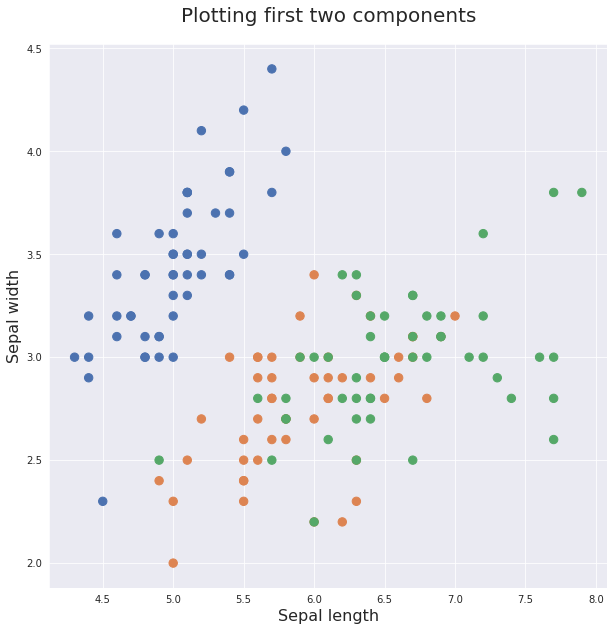

In [ ]:
plot_iris_2d(
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

## Sampling


### radnom sampling

In [ ]:
np.random.seed(0)
ind = np.random.choice(np.arange(data_iris.data.shape[0]), size = 120)
X_iris_random = data_iris.data[ind]
y_iris_random = data_iris.target[ind]

iris_random_df = pd.DataFrame(X_iris_random, columns=features)
iris_random_df['target'] = y_iris_random
iris_random_df['target'].value_counts()

2    42
0    40
1    38
Name: target, dtype: int64

### knn sampling - dummy version

In [101]:
def euclidean_distance(point1, point2):
  distance = 0.0
  for i in range(len(point1)-1):
    distance += (point1[i] - point2[i])**2
  return math.sqrt(distance)

def get_neighbors(train, test_row, num_neighbors, class_type):
  distances = list()
  for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  result_df = pd.DataFrame(columns=features)
  for i in range(num_neighbors):
    tmp_df = pd.DataFrame([distances[i][0]], columns=features)
    result_df = result_df.append(tmp_df, ignore_index=True)

  result_df['target'] = class_type
  return result_df

In [102]:
clf = NearestCentroid()
clf.fit(data_iris.data, data_iris.target)
clf.centroids_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [103]:
iris_target_values = np.unique(data_iris.target)
iris_knn_df = pd.DataFrame()

for i in iris_target_values:
  iris_knn_df = iris_knn_df.append(get_neighbors(data_iris.data, clf.centroids_[i], 40, str(i)), ignore_index=True)

iris_knn_df['target'].value_counts()

1    40
2    40
0    40
Name: target, dtype: int64

tSNE

In [ ]:
tsne = TSNE(n_components=2, n_iter=3000, random_state=RANDOM_STATE)
layers = tsne.fit_transform(iris_random_df.loc[:, features].values)

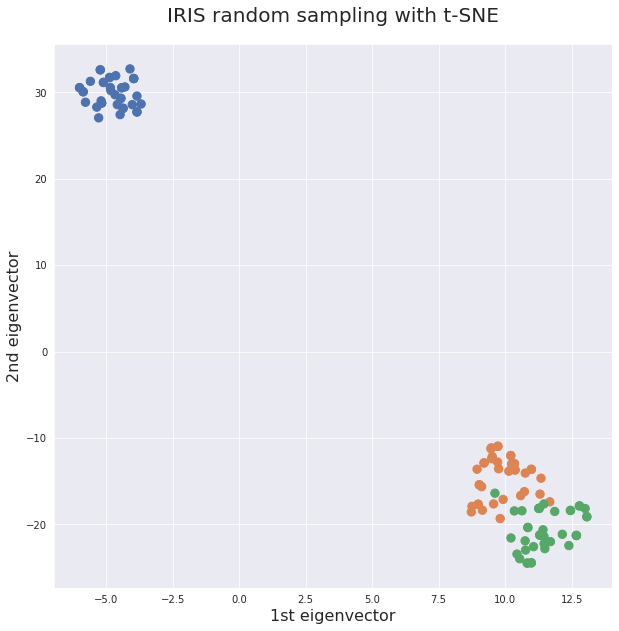

In [ ]:
plot_iris_2d(
    x = layers[:, 0],
    y = layers[:, 1],
    title = 'IRIS random sampling with t-SNE',
    colors=iris_random_df.loc[:, ['target']].values)

In [ ]:
tsne = TSNE(n_components=2, n_iter=3000, random_state=RANDOM_STATE)
layers = tsne.fit_transform(iris_knn_df.loc[:, features].values)

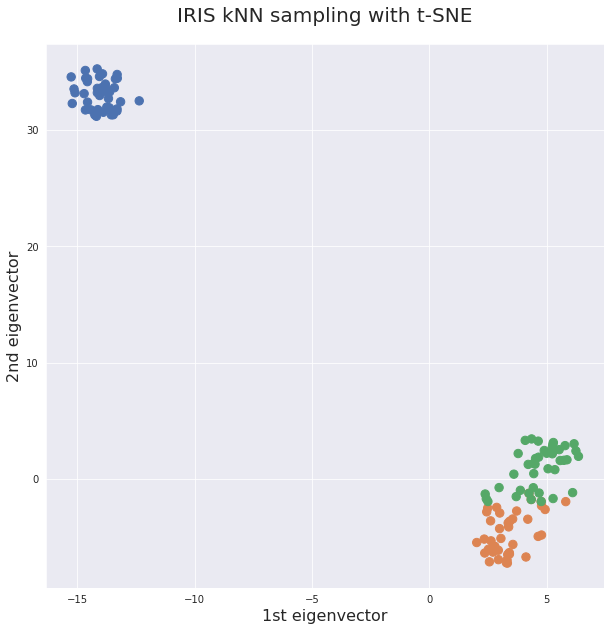

In [ ]:
plot_iris_2d(
    x = layers[:, 0],
    y = layers[:, 1],
    title = 'IRIS kNN sampling with t-SNE',
    colors=iris_knn_df.loc[:, ['target']].values)

# LION tSNE

### random sampling

In [ ]:
%%capture
lionTSNE_iris = lion_tsne.LionTSNE(perplexity=30)
layers = lionTSNE_iris.fit(iris_random_df.loc[:, features].values, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

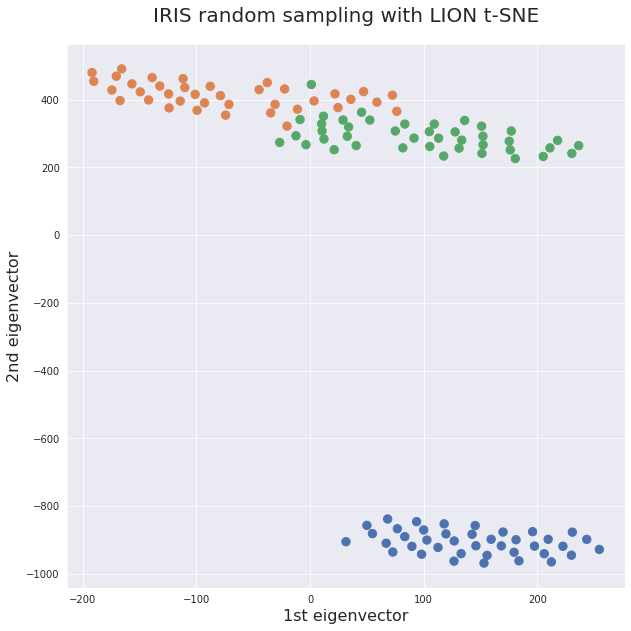

In [ ]:
plot_iris_2d(
    x = layers[:, 0],
    y = layers[:, 1],
    title = 'IRIS random sampling with LION t-SNE',
    colors=iris_random_df.loc[:, ['target']].values)

### kNN sampling

In [ ]:
%%capture
lionTSNE_iris = lion_tsne.LionTSNE(perplexity=30)
layers = lionTSNE_iris.fit(iris_knn_df.loc[:, features].values, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

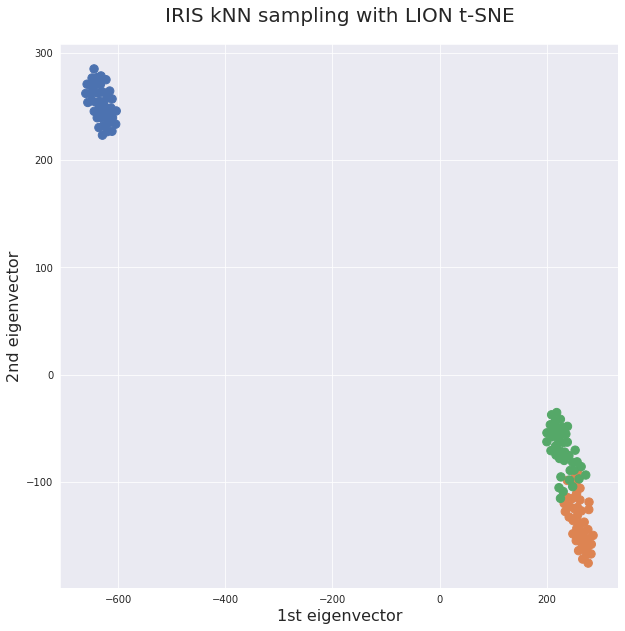

In [ ]:
plot_iris_2d(
    x = layers[:, 0],
    y = layers[:, 1],
    title = 'IRIS kNN sampling with LION t-SNE',
    colors=iris_knn_df.loc[:, ['target']].values)

### random sampling with PCA

In [ ]:
%%capture
iris_pca = PCA(n_components=4)
X_iris_pca = iris_pca.fit_transform(iris_random_df.loc[:, features].values)

lionTSNE_iris = lion_tsne.LionTSNE(perplexity=30)
layers = lionTSNE_iris.fit(X_iris_pca, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

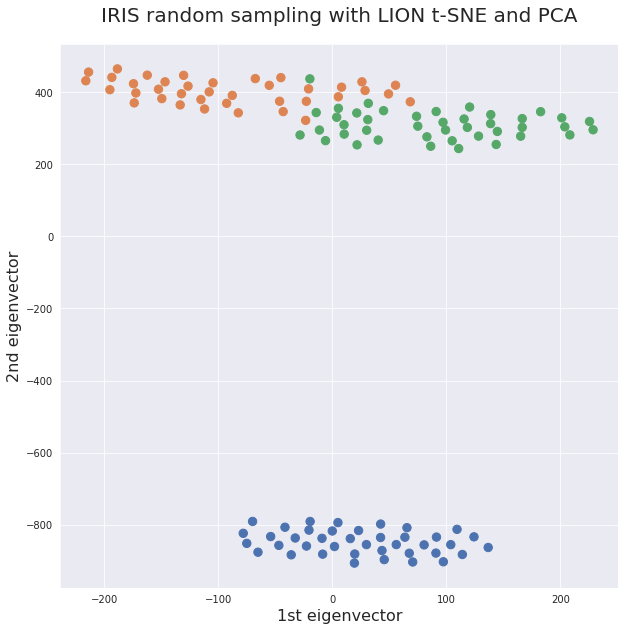

In [ ]:
plot_iris_2d(
    x = layers[:, 0],
    y = layers[:, 1],
    title = 'IRIS random sampling with LION t-SNE and PCA',
    colors=iris_random_df.loc[:, ['target']].values)

### kNN sampling with PCA

In [ ]:
%%capture
iris_pca = PCA(n_components=4)
X_iris_pca = iris_pca.fit_transform(iris_knn_df.loc[:, features].values)

lionTSNE_iris = lion_tsne.LionTSNE(perplexity=30)
layers = lionTSNE_iris.fit(X_iris_pca, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

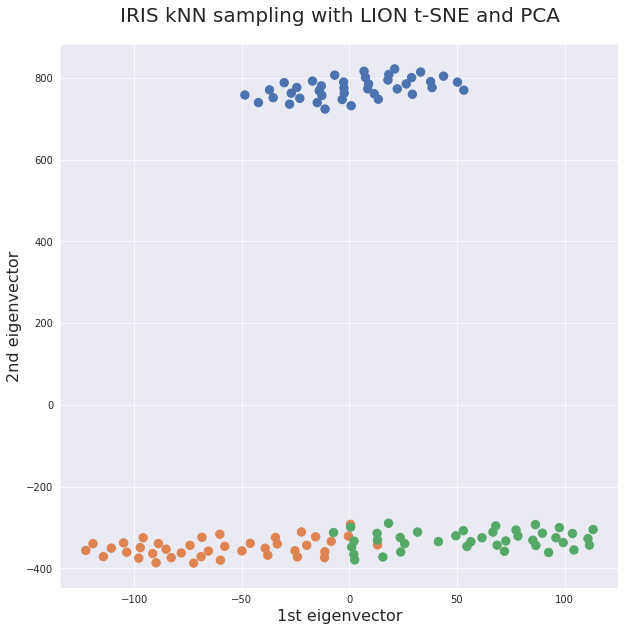

In [ ]:
plot_iris_2d(
    x = layers[:, 0],
    y = layers[:, 1],
    title = 'IRIS kNN sampling with LION t-SNE and PCA',
    colors=iris_knn_df.loc[:, ['target']].values)

### random sampling with MDS

In [ ]:
%%capture
iris_mds = MDS(n_components=4)
X_iris_mds = iris_mds.fit_transform(iris_random_df.loc[:, features].values)

lionTSNE_iris = lion_tsne.LionTSNE(perplexity=30)
layers = lionTSNE_iris.fit(X_iris_mds, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

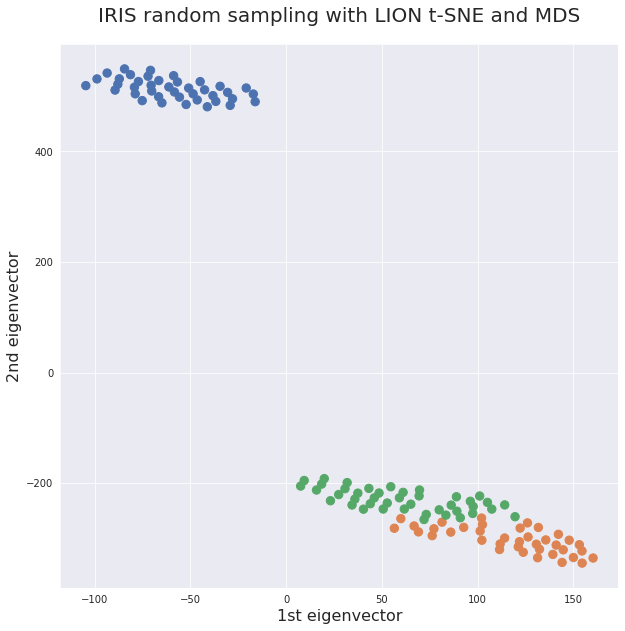

In [ ]:
plot_iris_2d(
    x = layers[:, 0],
    y = layers[:, 1],
    title = 'IRIS random sampling with LION t-SNE and MDS',
    colors=iris_random_df.loc[:, ['target']].values)

### kNN sampling with MDS

In [ ]:
%%capture
iris_mds = MDS(n_components=4)
X_iris_mds = iris_mds.fit_transform(iris_knn_df.loc[:, features].values)

lionTSNE_iris = lion_tsne.LionTSNE(perplexity=30)
layers = lionTSNE_iris.fit(X_iris_mds, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

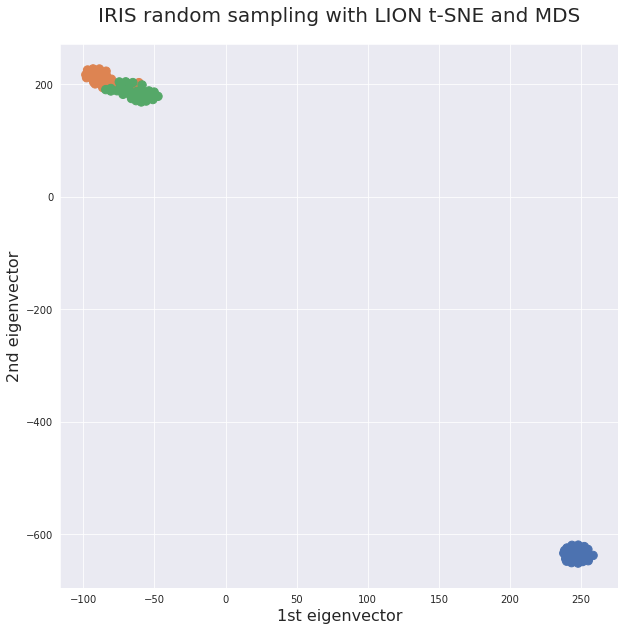

In [ ]:
plot_iris_2d(
    x = layers[:, 0],
    y = layers[:, 1],
    title = 'IRIS random sampling with LION t-SNE and MDS',
    colors=iris_knn_df.loc[:, ['target']].values)

# MNIST DATASET TESTS

In [ ]:
def plot_mnist_2d(df, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    plt.gcf().set_size_inches(20,15)
    sns.set_style("darkgrid")
    legend_list = list()

    for d in data_digits.target_names:
      plt.scatter(df[df['target'] == str(d)]['1st eigenvector'], df[df['target'] == str(d)]['2nd eigenvector'])
      legend_list.append(str(d))

    plt.title(title, fontsize=20, y=1.03)
    plt.legend(legend_list)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [104]:
%%capture
data_digits = datasets.load_digits()
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

all_mnist_trained_images = mnist.train.images
all_mnist_labels = mnist.train.labels

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


## Random sampling

In [ ]:
np.random.seed(RANDOM_STATE)
ind = np.random.choice(np.arange(len(mnist.train.images)), size = 2000)

mnist_chosen_indices = ind
X_mnist_rand = mnist.train.images[ind]
y_mnist_raw = mnist.train.labels[ind]
y_mnist_rand = [np.where(r==1)[0][0] for r in y_mnist_raw]

In [ ]:
mnist_random_df = pd.DataFrame(X_mnist_rand)
mnist_random_df['target'] = y_mnist_rand
mnist_random_df['target'].value_counts()

7    230
1    228
9    216
3    206
5    193
0    193
8    190
6    188
2    186
4    170
Name: target, dtype: int64

kNN sampling

In [ ]:
def get_mnist_neighbors(train, test_row, num_neighbors, class_type):
  distances = list()
  for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  result_df = pd.DataFrame()
  for i in range(num_neighbors):
    tmp_df = pd.DataFrame([distances[i][0]])
    result_df = result_df.append(tmp_df, ignore_index=True)

  result_df['target'] = class_type
  return result_df

In [ ]:
clf = NearestCentroid()
mnist_train_labels = [np.where(r==1)[0][0] for r in mnist.train.labels[:12000]] 
clf.fit(mnist.train.images[:12000], mnist_train_labels)
clf.centroids_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
mnist_target_values = np.unique(mnist_train_labels)
mnist_knn_df = pd.DataFrame()

for i in mnist_target_values:
  mnist_knn_df = mnist_knn_df.append(get_mnist_neighbors(mnist.train.images[:12000], clf.centroids_[i], 200, str(i)), ignore_index=True)

mnist_knn_df['target'].value_counts()

2    200
0    200
3    200
6    200
9    200
1    200
8    200
7    200
4    200
5    200
Name: target, dtype: int64

## tSNE MNIST with random sampling

In [ ]:
tsne = TSNE(n_components=2, n_iter=3000, random_state=RANDOM_STATE)
layers = tsne.fit_transform(mnist_random_df.loc[:, mnist_random_df.columns != 'target'].values)

In [ ]:
mnist_df = pd.DataFrame(layers, columns=['1st eigenvector', '2nd eigenvector'])
mnist_df['target'] = mnist_random_df['target'].values

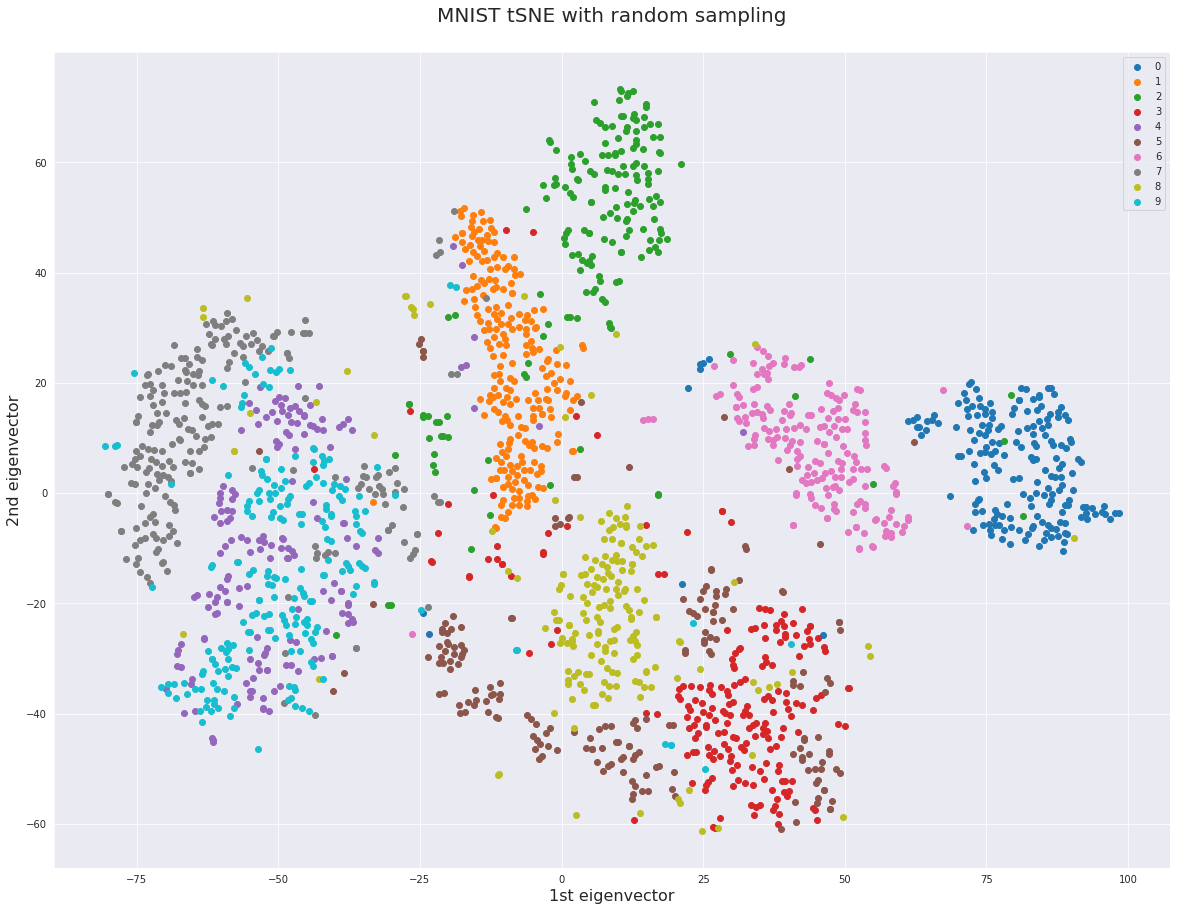

In [ ]:
plot_mnist_2d(
    mnist_df,
    title = 'MNIST tSNE with random sampling')

## tSNE MNIST with kNN sampling

In [ ]:
tsne = TSNE(n_components=2, n_iter=3000, random_state=RANDOM_STATE)
layers = tsne.fit_transform(mnist_knn_df.loc[:, mnist_knn_df.columns != 'target'].values)

In [ ]:
mnist_df = pd.DataFrame(layers, columns=['1st eigenvector', '2nd eigenvector'])
mnist_df['target'] = mnist_knn_df['target'].values

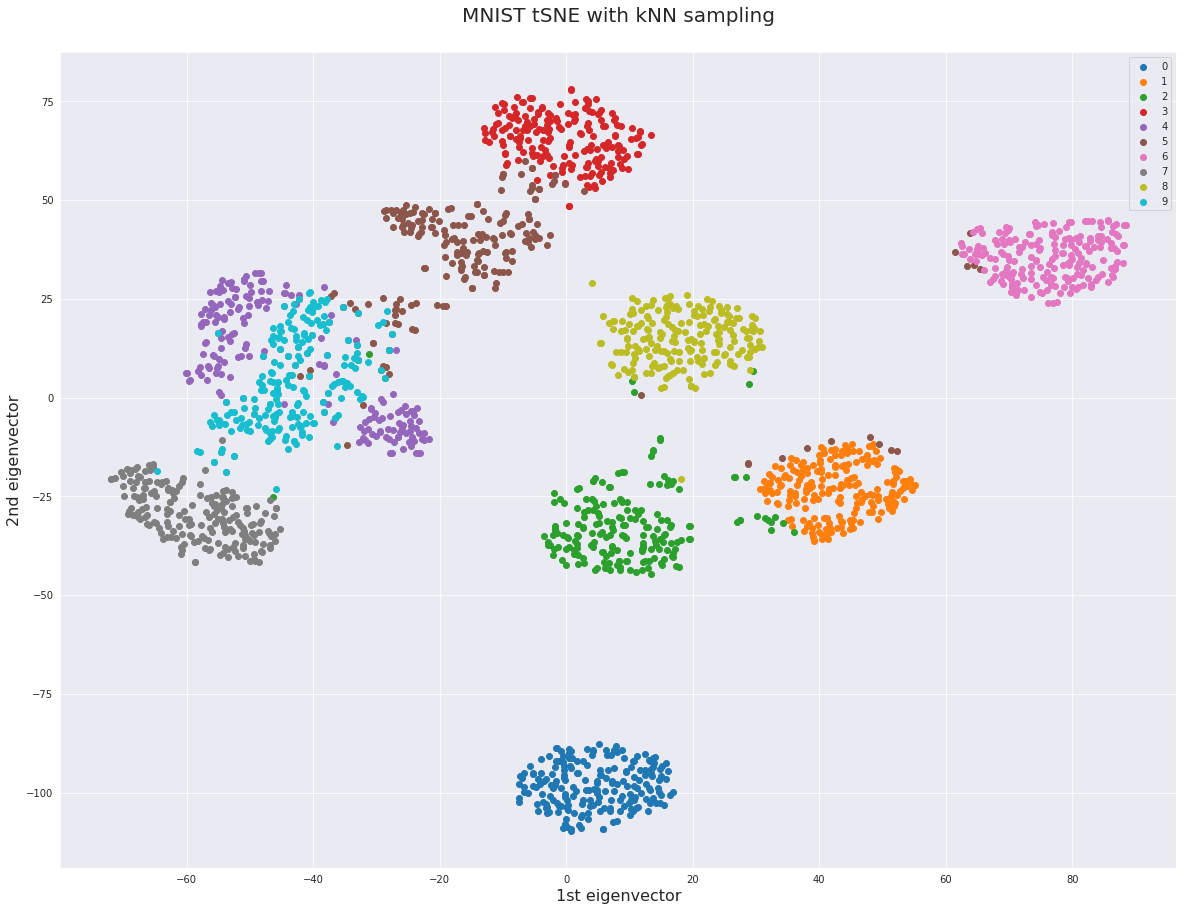

In [ ]:
plot_mnist_2d(
    mnist_df,
    title = 'MNIST tSNE with kNN sampling')

## LION tSNE MNIST

## with random sampling

In [ ]:
%%capture
lionTSNE_mnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_mnist = lionTSNE_mnist.fit(mnist_random_df.loc[:, mnist_random_df.columns != 'target'].values, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
lionrn_mnist_df = pd.DataFrame(Y_lionTSNE_mnist, columns=['1st eigenvector', '2nd eigenvector'])
lionrn_mnist_df['target'] = mnist_random_df['target'].values

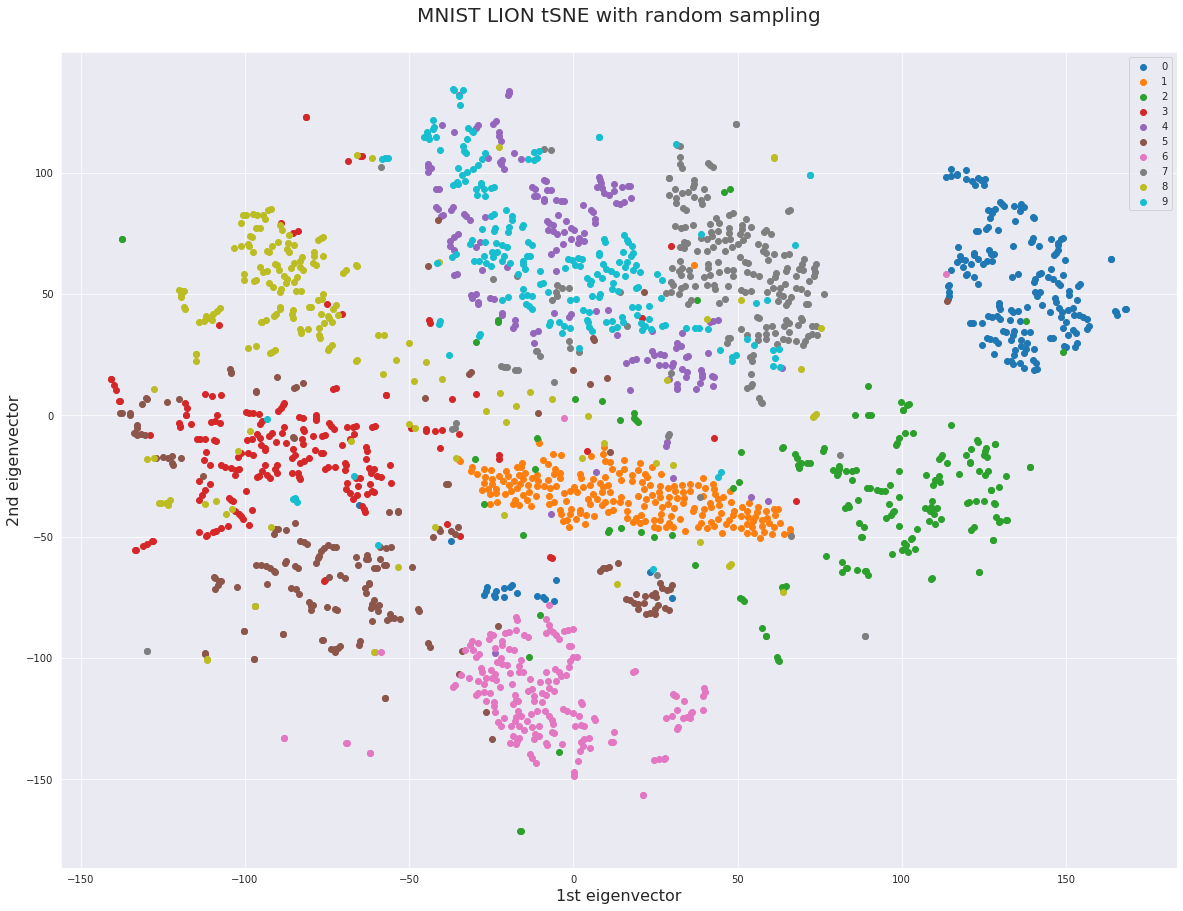

In [ ]:
plot_mnist_2d(
    lionrn_mnist_df,
    title = 'MNIST LION tSNE with random sampling')

## with kNN sampling

In [ ]:
%%capture
lionTSNE_mnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_knn_mnist = lionTSNE_mnist.fit(mnist_knn_df.loc[:, mnist_knn_df.columns != 'target'].values, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
lionknn_mnist_df = pd.DataFrame(Y_lionTSNE_knn_mnist, columns=['1st eigenvector', '2nd eigenvector'])
lionknn_mnist_df['target'] = mnist_knn_df['target'].values

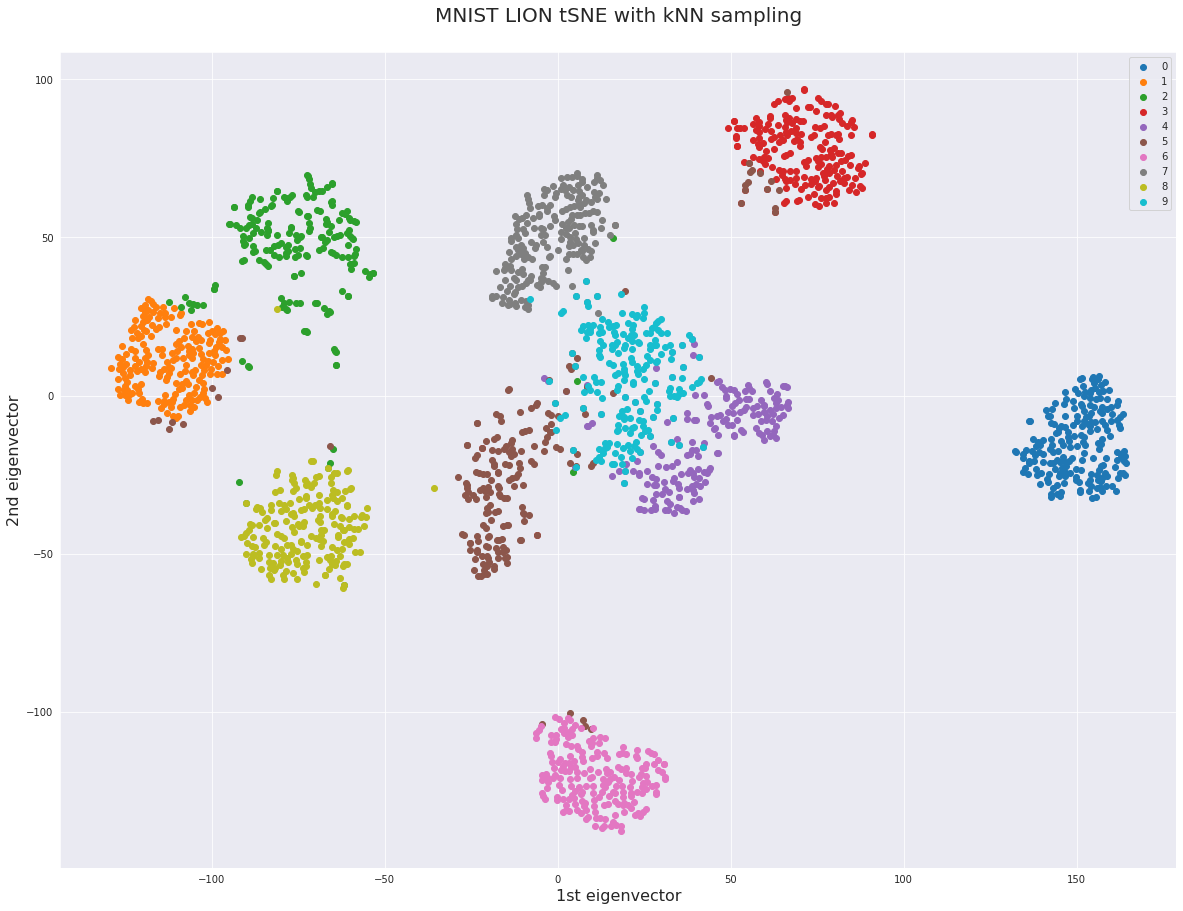

In [ ]:
plot_mnist_2d(
    lionknn_mnist_df,
    title = 'MNIST LION tSNE with kNN sampling')

## with MDS

In [ ]:
%%capture
mnist_mds = MDS(n_components=2)
X_mnist_mds = mnist_mds.fit_transform(mnist_random_df.loc[:, mnist_random_df.columns != 'target'].values)

lionTSNE_mnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_mds_rn_mnist = lionTSNE_mnist.fit(X_mnist_mds, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
mnist_lion_mds_df = pd.DataFrame(Y_lionTSNE_mds_rn_mnist, columns=['1st eigenvector', '2nd eigenvector'])
mnist_lion_mds_df['target'] = mnist_random_df['target'].values

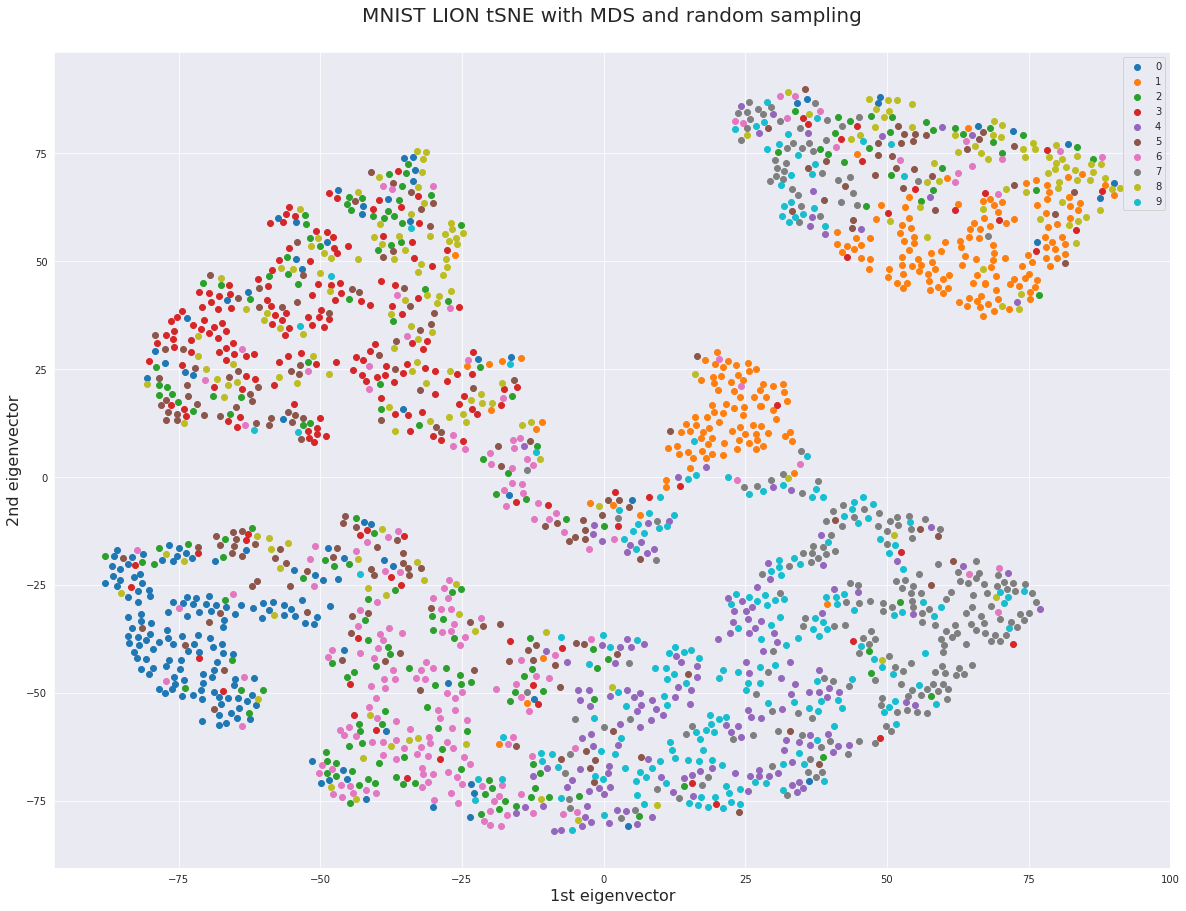

In [ ]:
plot_mnist_2d(
    mnist_lion_mds_df,
    title = 'MNIST LION tSNE with MDS and random sampling')

In [ ]:
%%capture
mnist_mds = MDS(n_components=2)
X_mnist_mds = mnist_mds.fit_transform(mnist_knn_df.loc[:, mnist_knn_df.columns != 'target'].values)

lionTSNE_mnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_mds_knn_mnist = lionTSNE_mnist.fit(X_mnist_mds, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
mnist_lion_knn_mds_df = pd.DataFrame(Y_lionTSNE_mds_knn_mnist, columns=['1st eigenvector', '2nd eigenvector'])
mnist_lion_knn_mds_df['target'] = mnist_knn_df['target'].values

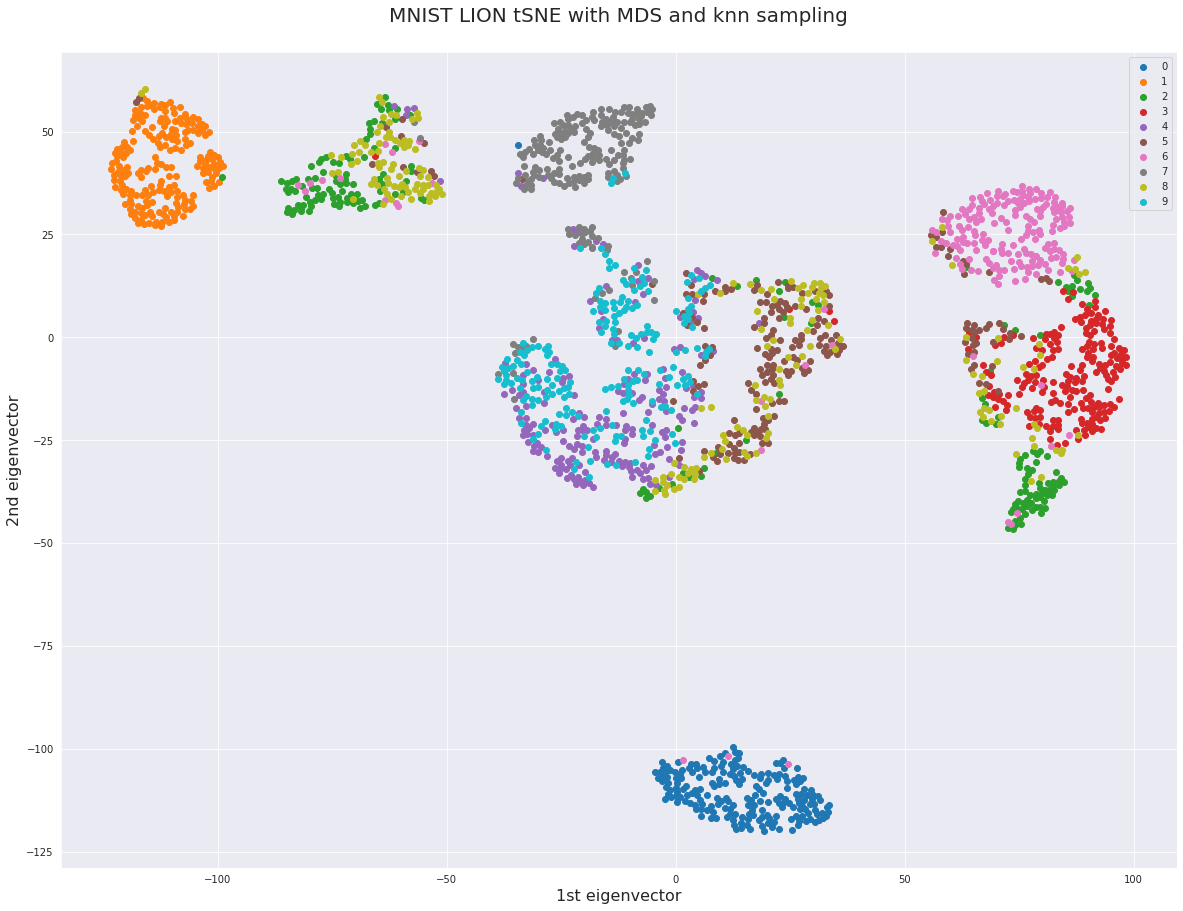

In [ ]:
plot_mnist_2d(
    mnist_lion_knn_mds_df,
    title = 'MNIST LION tSNE with MDS and knn sampling')

In [ ]:
%%capture
mnist_pca = PCA(n_components=2)
X_mnist_pca = mnist_pca.fit_transform(mnist_random_df.loc[:, mnist_random_df.columns != 'target'].values)

lionTSNE_mnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_pca_rn_mnist = lionTSNE_mnist.fit(X_mnist_pca, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
mnist_lion_pca_df = pd.DataFrame(Y_lionTSNE_pca_rn_mnist, columns=['1st eigenvector', '2nd eigenvector'])
mnist_lion_pca_df['target'] = mnist_random_df['target'].values

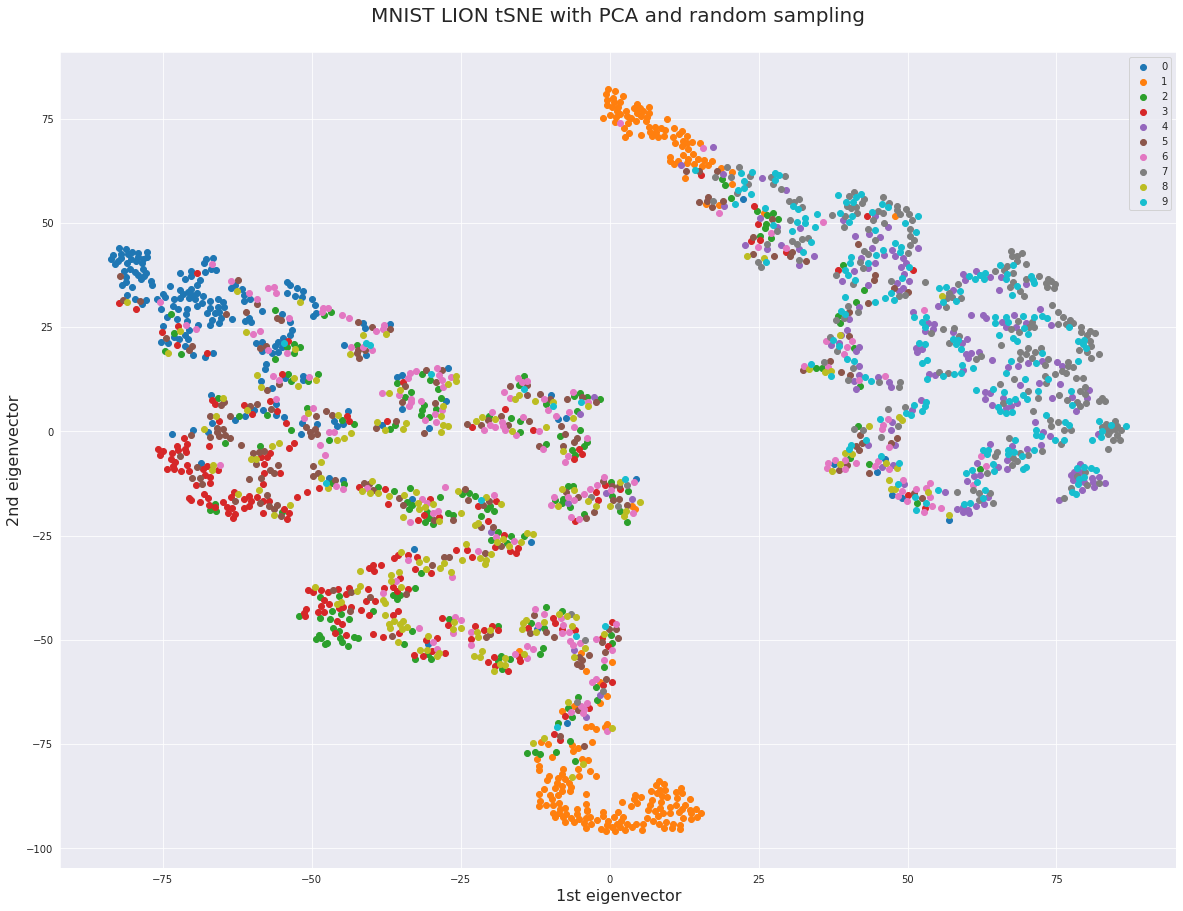

In [ ]:
plot_mnist_2d(
    mnist_lion_pca_df,
    title = 'MNIST LION tSNE with PCA and random sampling')

In [ ]:
%%capture
mnist_pca = PCA(n_components=2)
X_mnist_pca = mnist_pca.fit_transform(mnist_knn_df.loc[:, mnist_knn_df.columns != 'target'].values)

lionTSNE_mnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_pca_knn_mnist = lionTSNE_mnist.fit(X_mnist_pca, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
mnist_lion_knn_pca_df = pd.DataFrame(Y_lionTSNE_pca_knn_mnist, columns=['1st eigenvector', '2nd eigenvector'])
mnist_lion_knn_pca_df['target'] = mnist_knn_df['target'].values

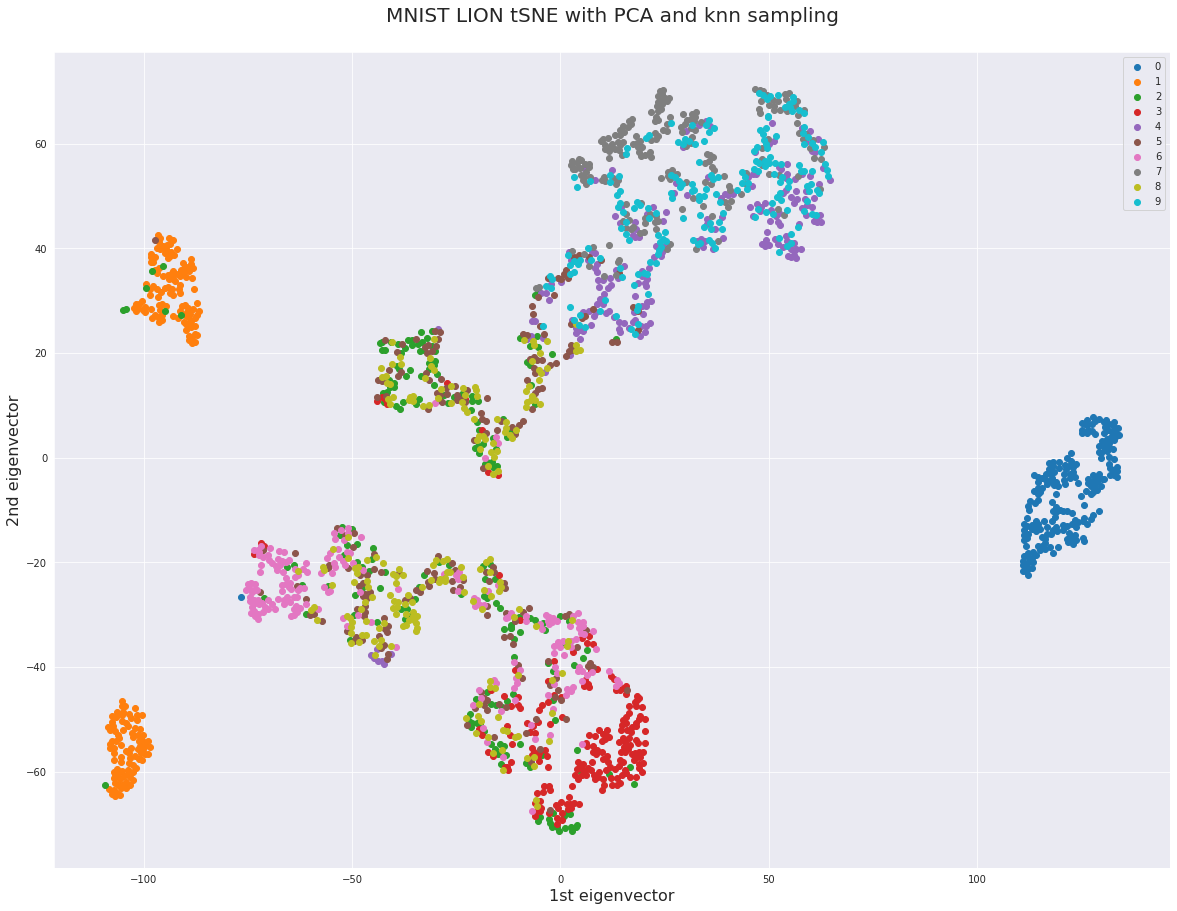

In [ ]:
plot_mnist_2d(
    mnist_lion_knn_pca_df,
    title = 'MNIST LION tSNE with PCA and knn sampling')

# Fashion MNIST

In [ ]:
df_fmnist = pd.read_csv('datasets/fashion-mnist.csv')

In [ ]:
df_images = df_fmnist[:25]
df_images = df_images.drop(columns=['2.5'])
df_images /= 255
images = df_images.values.reshape(25, 28, 28)

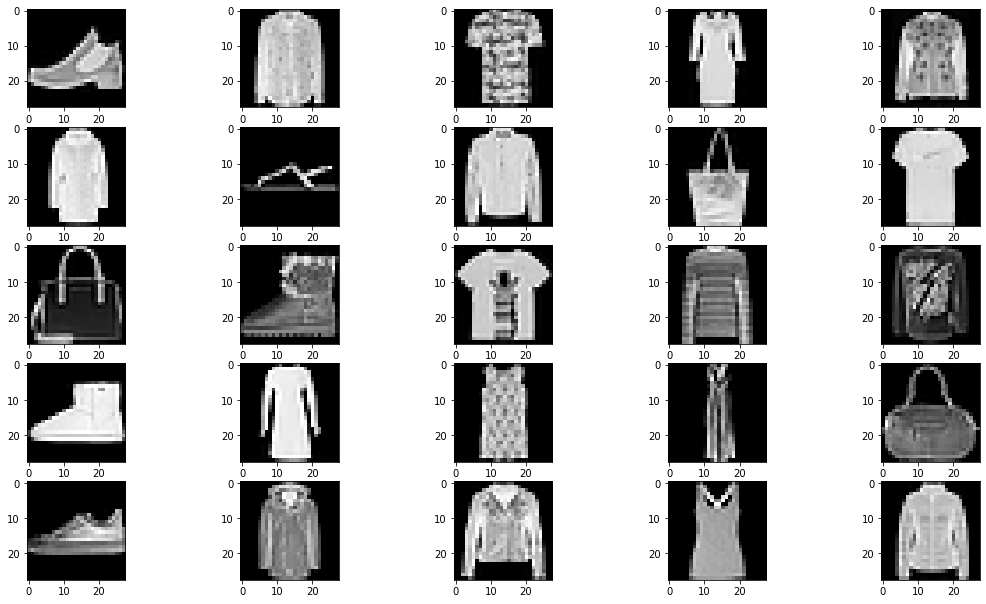

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
for i in range(25):
	plt.subplot(5 , 5, i+1)
	plt.imshow(images[i], cmap=plt.get_cmap('gray'))

### Random sampling

In [ ]:
fmnist_train = df_fmnist[:12000]

In [ ]:
np.random.seed(0)
ind = np.random.choice(np.arange(12000), size = 2000)

X_fmnist_rand = fmnist_train.loc[ind]
X_fmnist_rand = X_fmnist_rand.drop(columns=['2.5'])
X_fmnist_rand /= 255
X_fmnist_rand.reset_index(drop=True, inplace=True)

y_fmnist_rand = fmnist_train.loc[ind, '2.5']
y_fmnist_rand.reset_index(drop=True, inplace=True)

In [ ]:
X_fmnist_rand

0  0.1       0.2  0.3  0.4  ...     0.301     0.302  0.303     0.304  0.305
0     0.0  0.0  0.000000  0.0  0.0  ...  0.000000  0.000000    0.0  0.000000    0.0
1     0.0  0.0  0.000000  0.0  0.0  ...  0.000000  0.000000    0.0  0.003922    0.0
2     0.0  0.0  0.000000  0.0  0.0  ...  0.007843  0.000000    0.0  0.000000    0.0
3     0.0  0.0  0.000000  0.0  0.0  ...  0.000000  0.000000    0.0  0.000000    0.0
4     0.0  0.0  0.000000  0.0  0.0  ...  0.000000  0.000000    0.0  0.000000    0.0
...   ...  ...       ...  ...  ...  ...       ...       ...    ...       ...    ...
1995  0.0  0.0  0.000000  0.0  0.0  ...  0.000000  0.000000    0.0  0.000000    0.0
1996  0.0  0.0  0.000000  0.0  0.0  ...  0.000000  0.000000    0.0  0.000000    0.0
1997  0.0  0.0  0.000000  0.0  0.0  ...  0.000000  0.000000    0.0  0.000000    0.0
1998  0.0  0.0  0.003922  0.0  0.0  ...  0.000000  0.003922    0.0  0.000000    0.0
1999  0.0  0.0  0.000000  0.0  0.0  ...  0.000000  0.000000    0.0  0.000000    0.0

[2000 rows x 784 columns]

In [ ]:
y_fmnist_rand 

0       9
1       8
2       6
3       7
4       3
       ..
1995    9
1996    1
1997    1
1998    6
1999    7
Name: 2.5, Length: 2000, dtype: int64

In [ ]:
y_fmnist_rand.value_counts()

7    226
9    213
8    207
3    201
1    197
0    195
2    193
6    191
4    191
5    186
Name: 2.5, dtype: int64

In [ ]:
fmnist_random_df = X_fmnist_rand
fmnist_random_df['target'] = y_fmnist_rand.values
fmnist_random_df

0  0.1       0.2  0.3  0.4  ...     0.302  0.303     0.304  0.305  target
0     0.0  0.0  0.000000  0.0  0.0  ...  0.000000    0.0  0.000000    0.0       9
1     0.0  0.0  0.000000  0.0  0.0  ...  0.000000    0.0  0.003922    0.0       8
2     0.0  0.0  0.000000  0.0  0.0  ...  0.000000    0.0  0.000000    0.0       6
3     0.0  0.0  0.000000  0.0  0.0  ...  0.000000    0.0  0.000000    0.0       7
4     0.0  0.0  0.000000  0.0  0.0  ...  0.000000    0.0  0.000000    0.0       3
...   ...  ...       ...  ...  ...  ...       ...    ...       ...    ...     ...
1995  0.0  0.0  0.000000  0.0  0.0  ...  0.000000    0.0  0.000000    0.0       9
1996  0.0  0.0  0.000000  0.0  0.0  ...  0.000000    0.0  0.000000    0.0       1
1997  0.0  0.0  0.000000  0.0  0.0  ...  0.000000    0.0  0.000000    0.0       1
1998  0.0  0.0  0.003922  0.0  0.0  ...  0.003922    0.0  0.000000    0.0       6
1999  0.0  0.0  0.000000  0.0  0.0  ...  0.000000    0.0  0.000000    0.0       7

[2000 rows x 785 columns]

### kNN sampling

In [ ]:
def get_fmnist_neighbors(train, test_row, num_neighbors, class_type):
  distances = list()
  for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  result_df = pd.DataFrame()
  for i in range(num_neighbors):
    tmp_df = pd.DataFrame([distances[i][0]])
    result_df = result_df.append(tmp_df, ignore_index=True)

  result_df['target'] = class_type
  return result_df

In [ ]:
X_fmnist = fmnist_train
X_fmnist = X_fmnist.drop(columns=['2.5'])
X_fmnist /= 255

y_fmnist = fmnist_train['2.5']

clf = NearestCentroid()
clf.fit(X_fmnist, y_fmnist)
clf.centroids_

array([[2.25933995e-05, 9.68288550e-05, 5.93883644e-04, ...,
        1.00702009e-03, 3.16307593e-04, 1.32332768e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.19329408e-04, 8.72205169e-05, 0.00000000e+00],
       [0.00000000e+00, 1.36878486e-05, 7.87051295e-05, ...,
        3.02672552e-02, 6.00896554e-03, 6.84392431e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.97008973e-06, 1.66168162e-05, 2.65869059e-05, ...,
        1.63642406e-02, 8.42472582e-03, 1.35260884e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.73322422e-02, 1.34623407e-02, 7.54147813e-04]])

In [ ]:
fmnist_target_values = np.unique(y_fmnist)
fmnist_knn_df = pd.DataFrame()

for i in fmnist_target_values:
  fmnist_knn_df = fmnist_knn_df.append(get_fmnist_neighbors(X_fmnist.values, clf.centroids_[int(i)], 200, str(i)), ignore_index=True)

fmnist_knn_df['target'].value_counts()

0    200
8    200
5    200
4    200
9    200
1    200
3    200
6    200
7    200
2    200
Name: target, dtype: int64

In [ ]:
def plot_fmnist_2d(df, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    plt.gcf().set_size_inches(20,15)
    sns.set_style("darkgrid")
    legend_list = list()

    for d in data_digits.target_names:
      plt.scatter(df[df['target'] == str(d)]['1st eigenvector'], df[df['target'] == str(d)]['2nd eigenvector'])
      #plt.scatter(df[df['target'] == d]['1st eigenvector'], df[df['target'] == d]['2nd eigenvector'])
      legend_list.append(str(d))

    plt.title(title, fontsize=20, y=1.03)
    plt.legend(legend_list)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

## tSNE with random sampling

In [ ]:
tsne = TSNE(n_components=2, n_iter=3000, random_state=RANDOM_STATE)
layers = tsne.fit_transform(fmnist_random_df.loc[:, fmnist_random_df.columns != 'target'].values)

In [ ]:
fmnist_df = pd.DataFrame(layers, columns=['1st eigenvector', '2nd eigenvector'])
fmnist_df['target'] = fmnist_random_df['target'].values

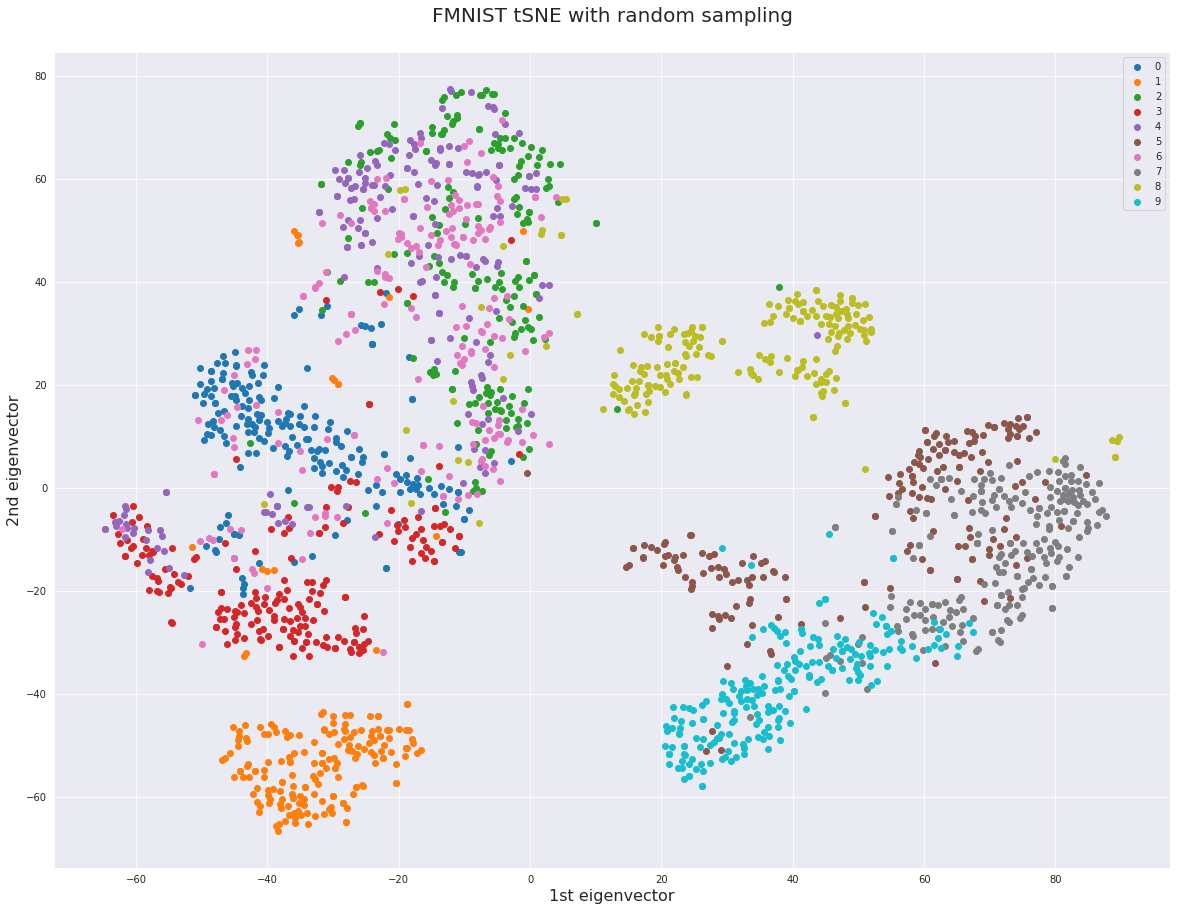

In [ ]:
plot_fmnist_2d(
    fmnist_df,
    title = 'FMNIST tSNE with random sampling')

tSNE with knn sampling

In [ ]:
tsne = TSNE(n_components=2, n_iter=3000, random_state=RANDOM_STATE)
layers = tsne.fit_transform(fmnist_knn_df.loc[:, fmnist_knn_df.columns != 'target'].values)

In [ ]:
fmnist_df = pd.DataFrame(layers, columns=['1st eigenvector', '2nd eigenvector'])
fmnist_df['target'] = fmnist_knn_df['target'].values

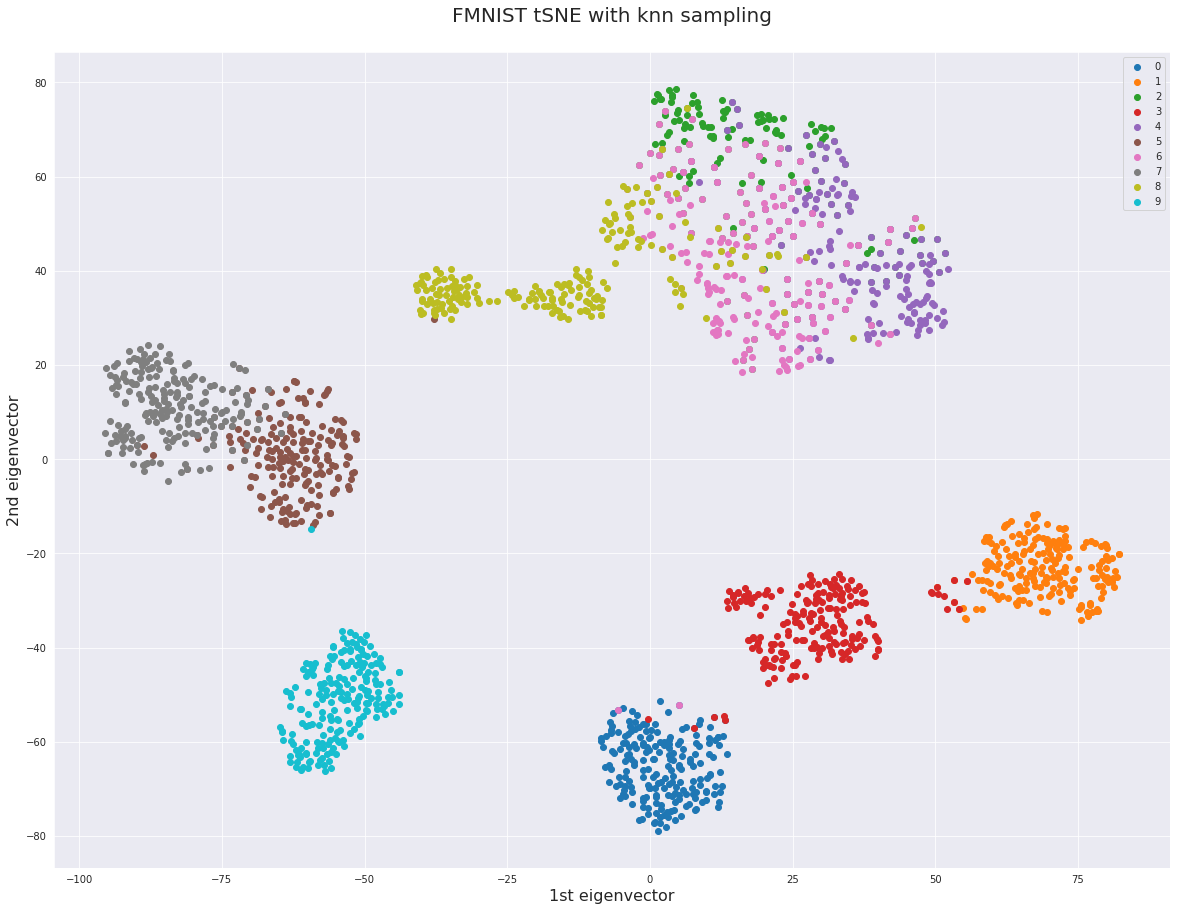

In [ ]:
plot_fmnist_2d(
    fmnist_df,
    title = 'FMNIST tSNE with knn sampling')

## LION tSNE with random sampling

In [ ]:
%%capture
lionTSNE_fmnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_fmnist = lionTSNE_fmnist.fit(fmnist_random_df.loc[:, fmnist_random_df.columns != 'target'].values, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
lionrn_fmnist_df = pd.DataFrame(Y_lionTSNE_fmnist, columns=['1st eigenvector', '2nd eigenvector'])
lionrn_fmnist_df['target'] = fmnist_random_df['target'].values

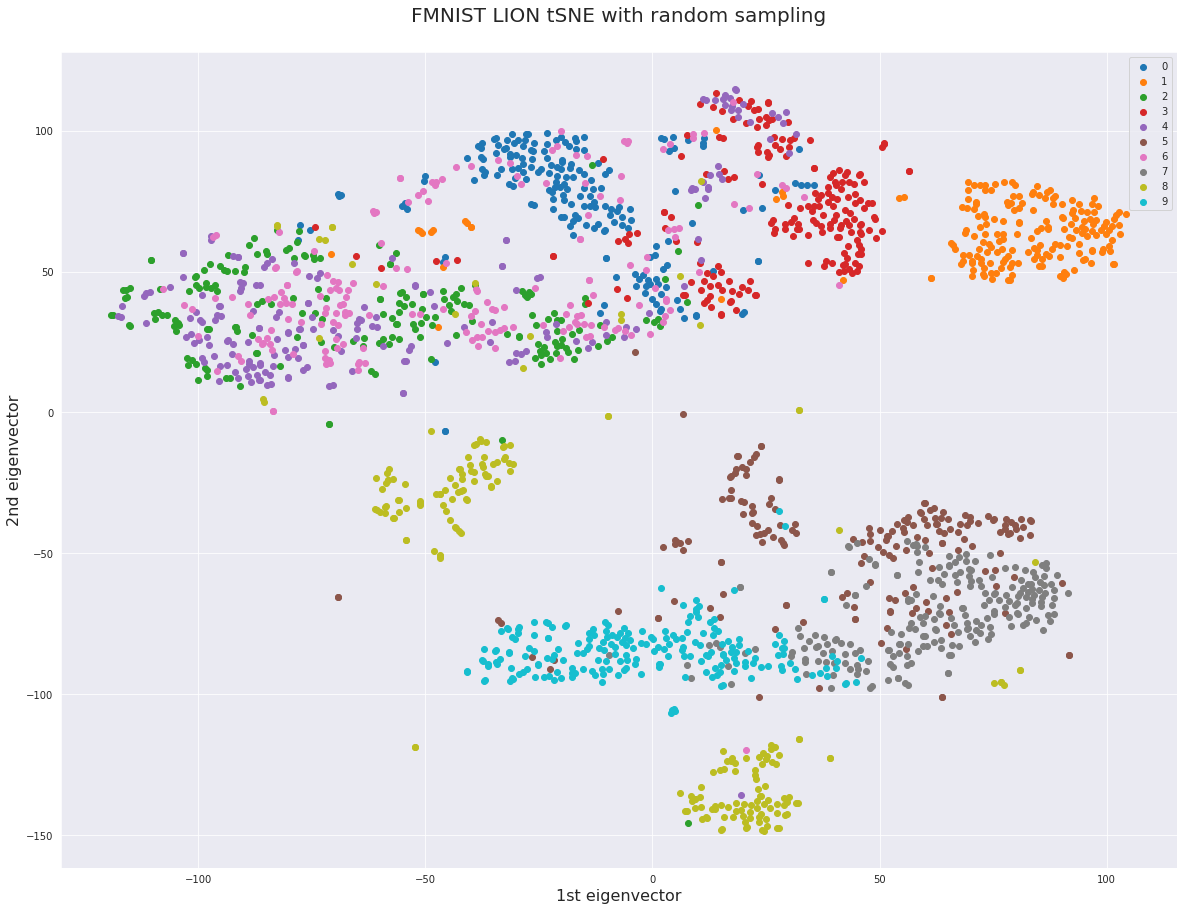

In [ ]:
plot_fmnist_2d(
    lionrn_fmnist_df,
    title = 'FMNIST LION tSNE with random sampling')

## LION tSNE with knn sampling

In [ ]:
%%capture
lionTSNE_fmnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_fmnist = lionTSNE_fmnist.fit(fmnist_knn_df.loc[:, fmnist_knn_df.columns != 'target'].values, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
lionknn_fmnist_df = pd.DataFrame(Y_lionTSNE_fmnist, columns=['1st eigenvector', '2nd eigenvector'])
lionknn_fmnist_df['target'] = fmnist_knn_df['target'].values

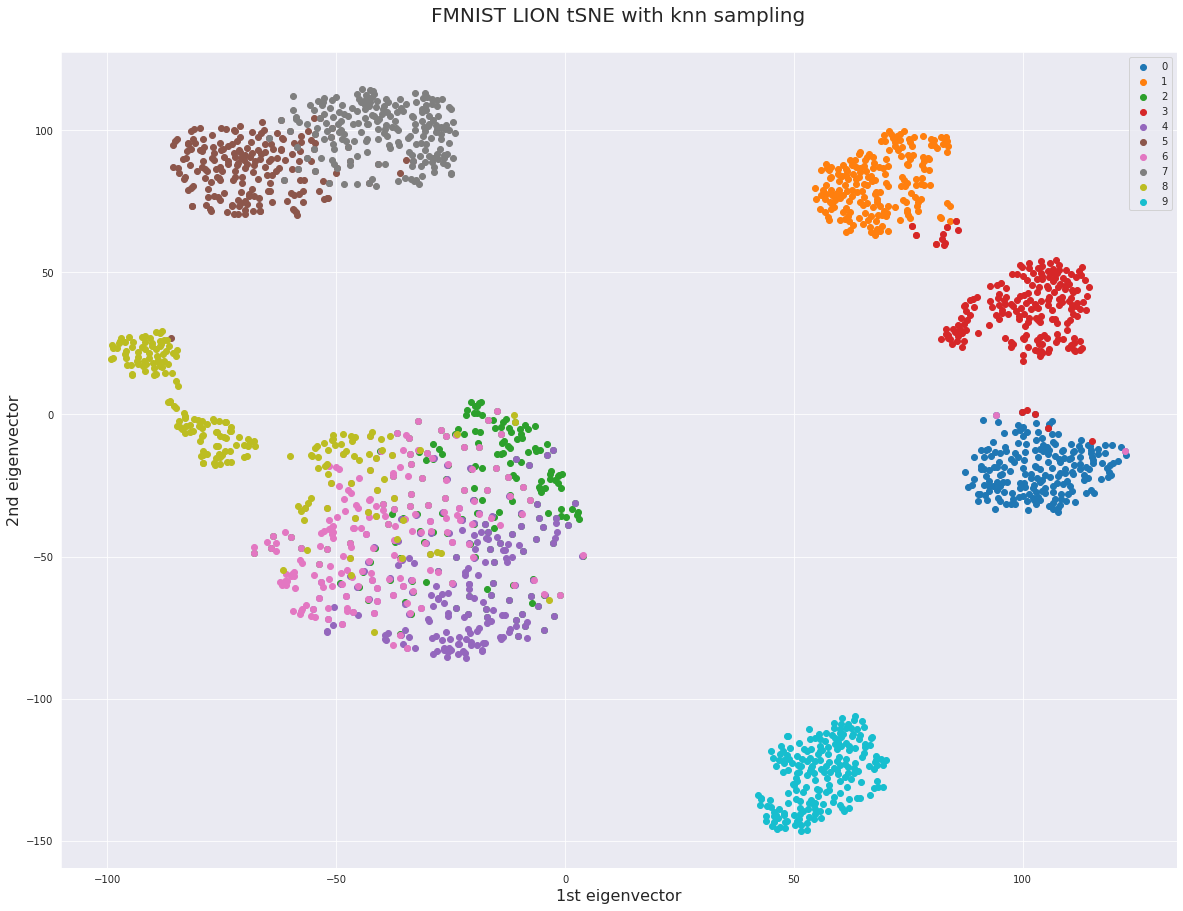

In [ ]:
plot_fmnist_2d(
    lionknn_fmnist_df,
    title = 'FMNIST LION tSNE with knn sampling')

## with MDS LION tSNE random sampling

In [ ]:
%%capture
fmnist_mds = MDS(n_components=2)
X_fmnist_mds = fmnist_mds.fit_transform(fmnist_random_df.loc[:, fmnist_random_df.columns != 'target'].values)

lionTSNE_fmnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_fmnist = lionTSNE_fmnist.fit(X_fmnist_mds, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
lionrn_mds_fmnist_df = pd.DataFrame(Y_lionTSNE_fmnist, columns=['1st eigenvector', '2nd eigenvector'])
lionrn_mds_fmnist_df['target'] = fmnist_random_df['target'].values

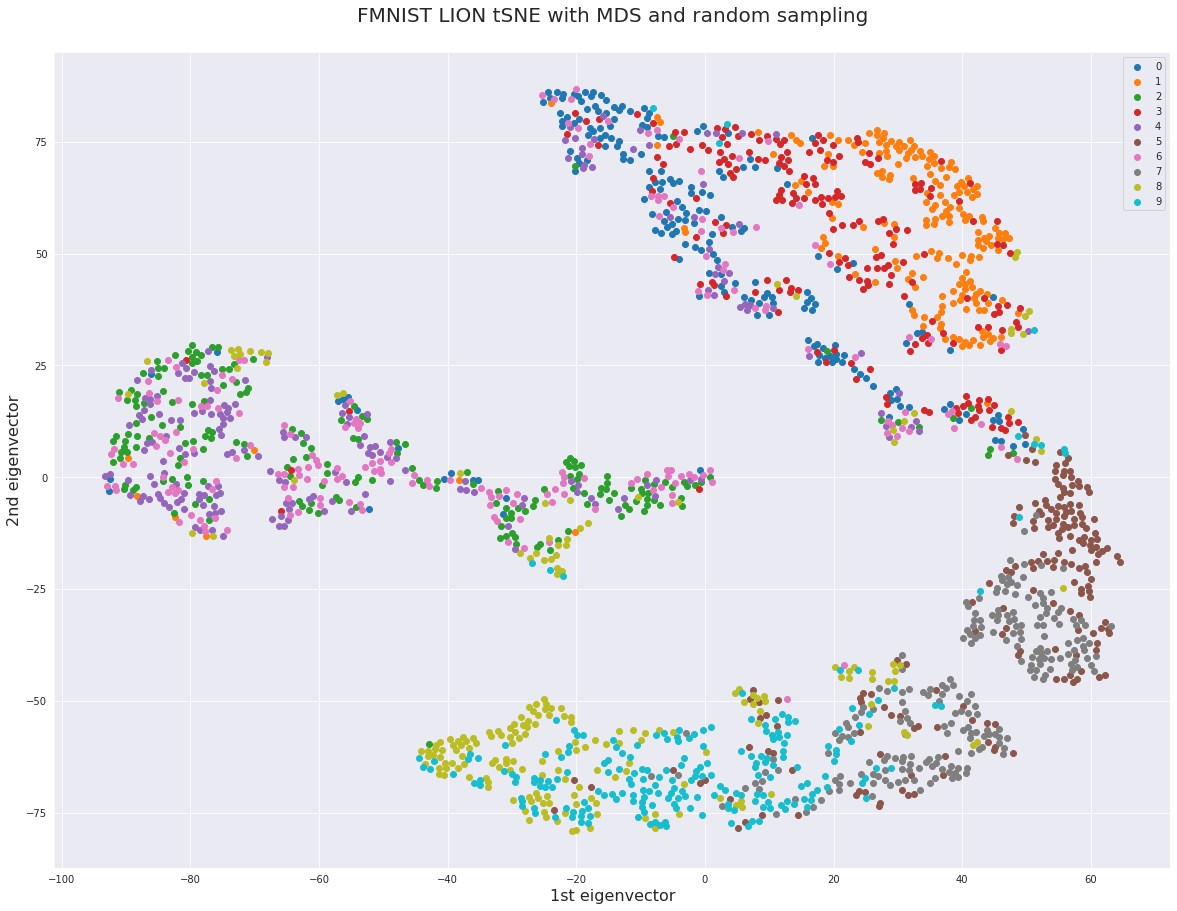

In [ ]:
plot_fmnist_2d(
    lionrn_mds_fmnist_df,
    title = 'FMNIST LION tSNE with MDS and random sampling')

## with MDS LION tSNE knn sampling

In [ ]:
%%capture
fmnist_mds = MDS(n_components=2)
X_fmnist_mds = fmnist_mds.fit_transform(fmnist_knn_df.loc[:, fmnist_knn_df.columns != 'target'].values)

lionTSNE_fmnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_fmnist = lionTSNE_fmnist.fit(X_fmnist_mds, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
lionknn_mds_fmnist_df = pd.DataFrame(Y_lionTSNE_fmnist, columns=['1st eigenvector', '2nd eigenvector'])
lionknn_mds_fmnist_df['target'] = fmnist_knn_df['target'].values

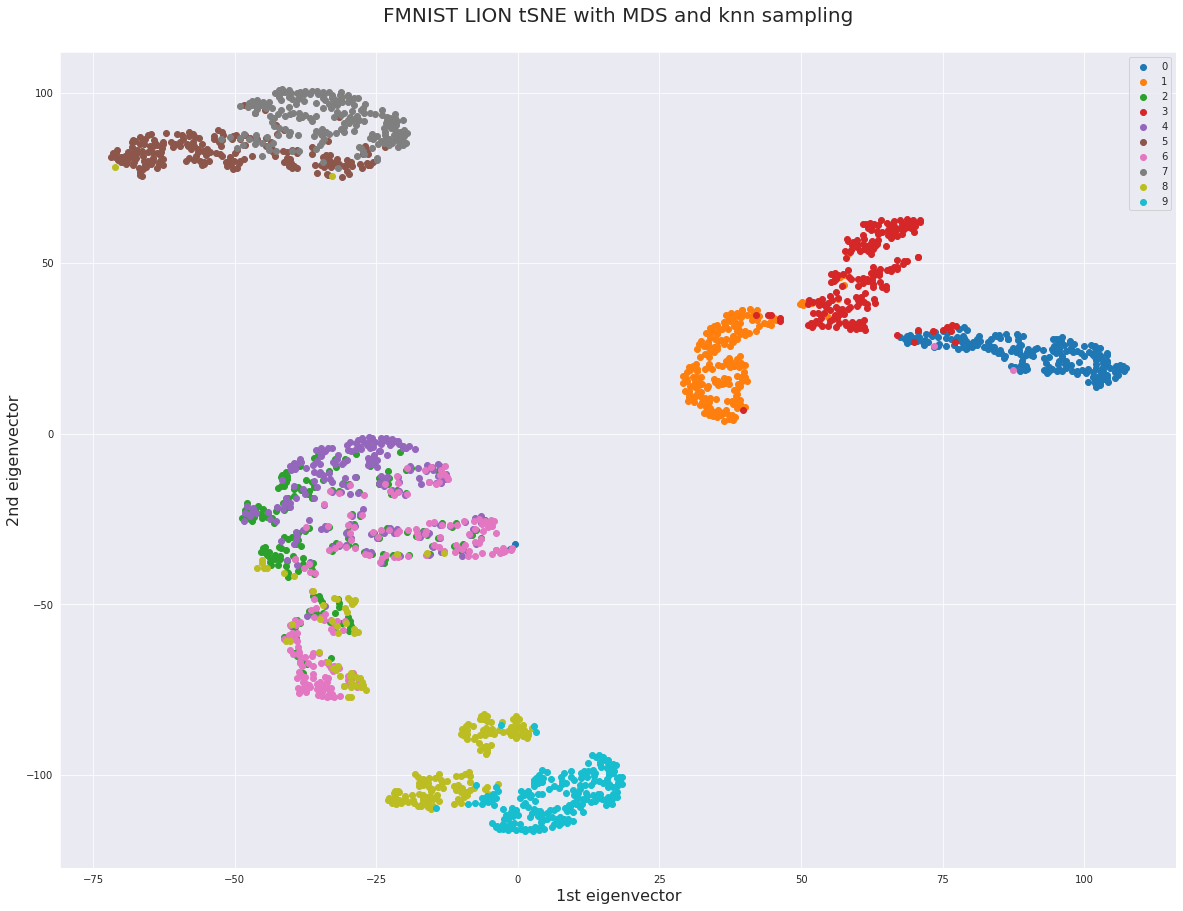

In [ ]:
plot_fmnist_2d(
    lionknn_mds_fmnist_df,
    title = 'FMNIST LION tSNE with MDS and knn sampling')

## with PCA LION tSNE random sampling

##  

In [ ]:
%%capture
fmnist_pca = PCA(n_components=2)
X_fmnist_pca = fmnist_pca.fit_transform(fmnist_random_df.loc[:, fmnist_random_df.columns != 'target'].values)

lionTSNE_fmnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_pca_rn_fmnist = lionTSNE_fmnist.fit(X_fmnist_pca, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
lionrn_pca_fmnist_df = pd.DataFrame(Y_lionTSNE_pca_rn_fmnist, columns=['1st eigenvector', '2nd eigenvector'])
lionrn_pca_fmnist_df['target'] = fmnist_random_df['target'].values

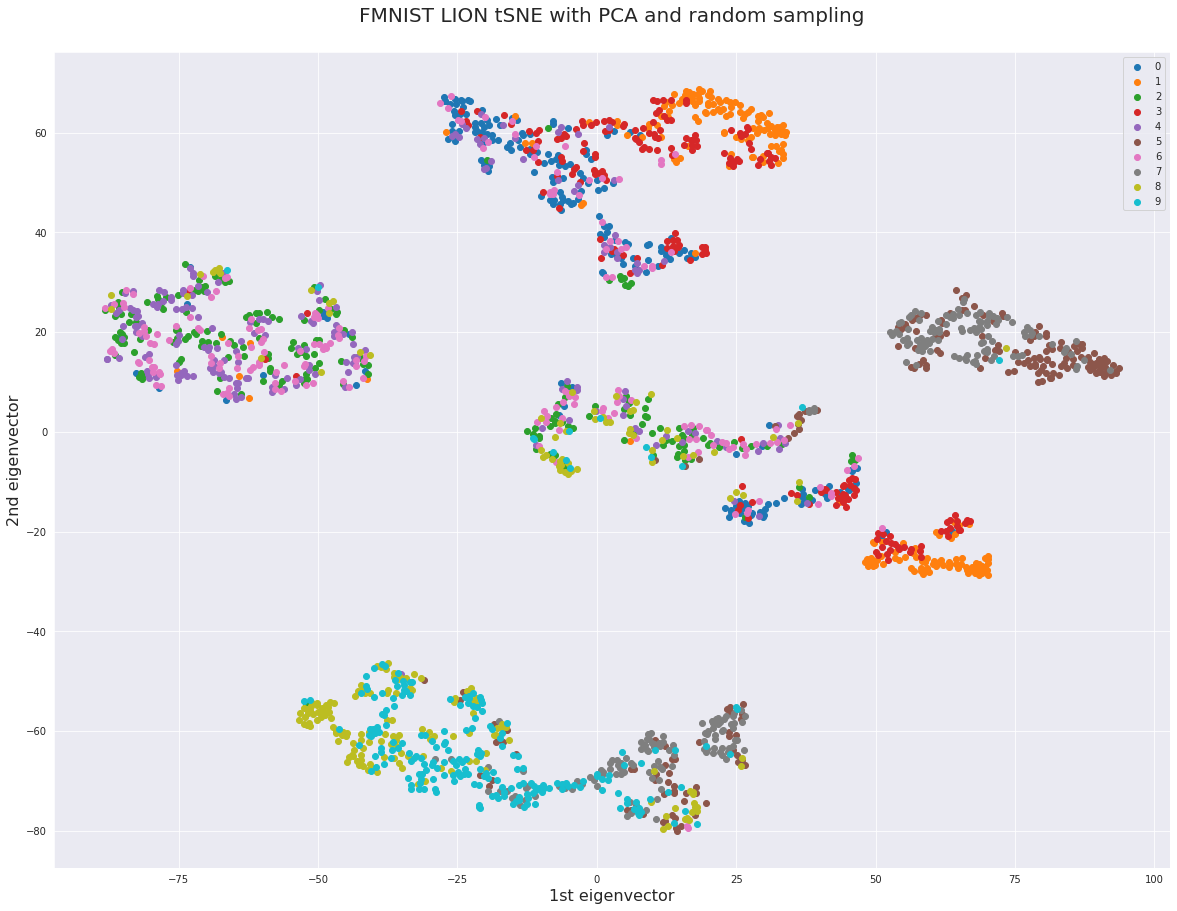

In [ ]:
plot_fmnist_2d(
    lionrn_pca_fmnist_df,
    title = 'FMNIST LION tSNE with PCA and random sampling')

## with PCA LION tSNE knn sampling

In [ ]:
%%capture
fmnist_pca = PCA(n_components=2)
X_fmnist_pca = fmnist_pca.fit_transform(fmnist_knn_df.loc[:, fmnist_knn_df.columns != 'target'].values)

lionTSNE_fmnist = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_pca_knn_fmnist = lionTSNE_fmnist.fit(X_fmnist_pca, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [ ]:
lionknn_pca_fmnist_df = pd.DataFrame(Y_lionTSNE_pca_knn_fmnist, columns=['1st eigenvector', '2nd eigenvector'])
lionknn_pca_fmnist_df['target'] = fmnist_knn_df['target'].values

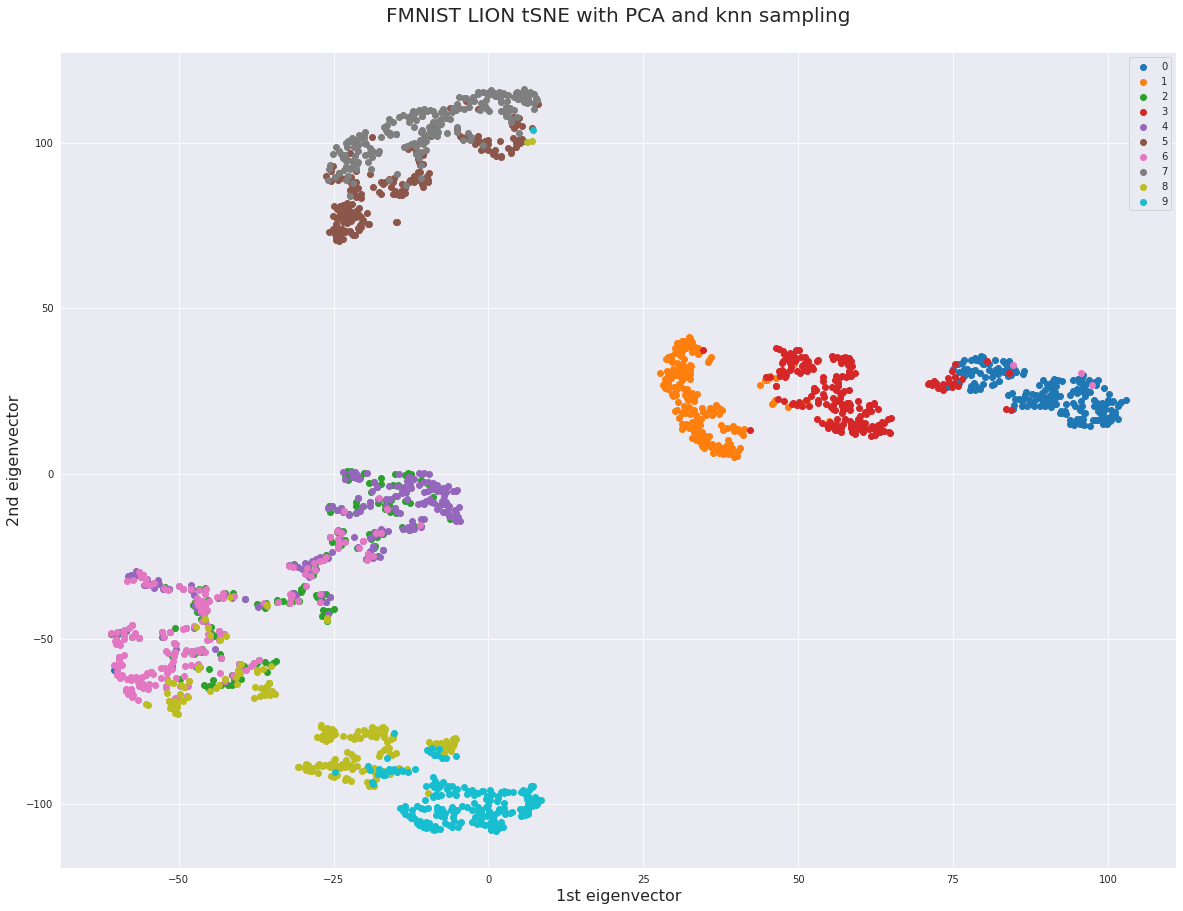

In [ ]:
plot_fmnist_2d(
    lionknn_pca_fmnist_df,
    title = 'FMNIST LION tSNE with PCA and knn sampling')

# Reuters dataset

In [3]:
df_rcv = pd.read_csv('datasets/rcv.csv')

In [16]:
rcv_train = df_rcv[:2000]
rcv_train = rcv_train.rename(columns={"3": "target",})

In [ ]:
def plot_2d(df, title, labels, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    plt.gcf().set_size_inches(20,15)
    sns.set_style("darkgrid")
    legend_list = list()

    for d in labels:
      plt.scatter(df[df['target'] == d]['1st eigenvector'], df[df['target'] == d]['2nd eigenvector'])
      #plt.scatter(df[df['target'] == d]['1st eigenvector'], df[df['target'] == d]['2nd eigenvector'])
      legend_list.append(str(d))

    plt.title(title, fontsize=20, y=1.03)
    plt.legend(legend_list)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

## tSNE Reuters

In [17]:
tsne = TSNE(n_components=2, n_iter=3000, random_state=RANDOM_STATE)
layers = tsne.fit_transform(rcv_train.loc[:, rcv_train.columns != 'target'].values)

In [18]:
tsne_rcv_df = pd.DataFrame(layers, columns=['1st eigenvector', '2nd eigenvector'])
tsne_rcv_df['target'] = rcv_train['target'].values

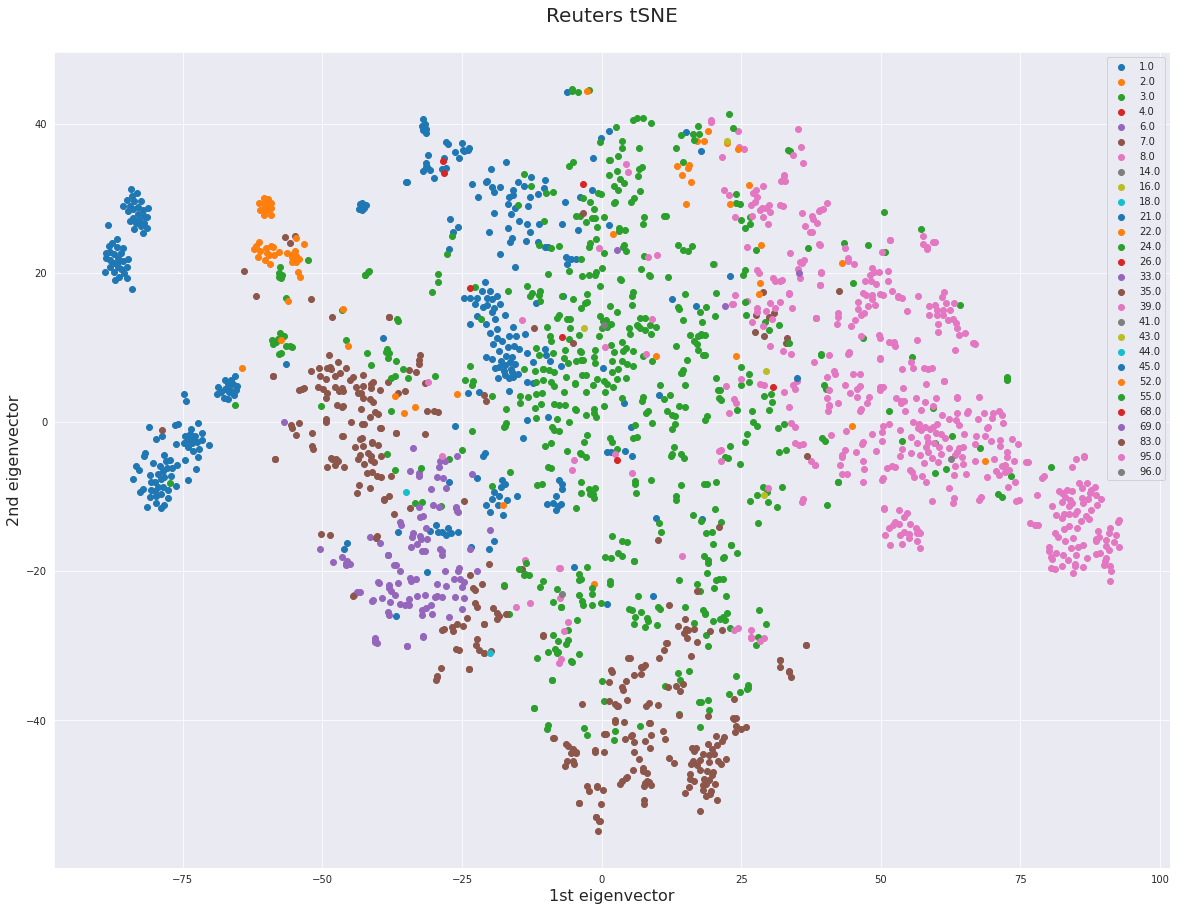

In [29]:
plot_2d(
    tsne_rcv_df,
    title = 'Reuters tSNE',
    labels=np.unique(tsne_rcv_df['target']))

## LION tSNE Reuters

In [20]:
%%capture
lionTSNE_rcv = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_rcv = lionTSNE_rcv.fit(rcv_train.loc[:, rcv_train.columns != 'target'].values, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [21]:
lion_rcv_df = pd.DataFrame(Y_lionTSNE_rcv, columns=['1st eigenvector', '2nd eigenvector'])
lion_rcv_df['target'] = rcv_train['target'].values

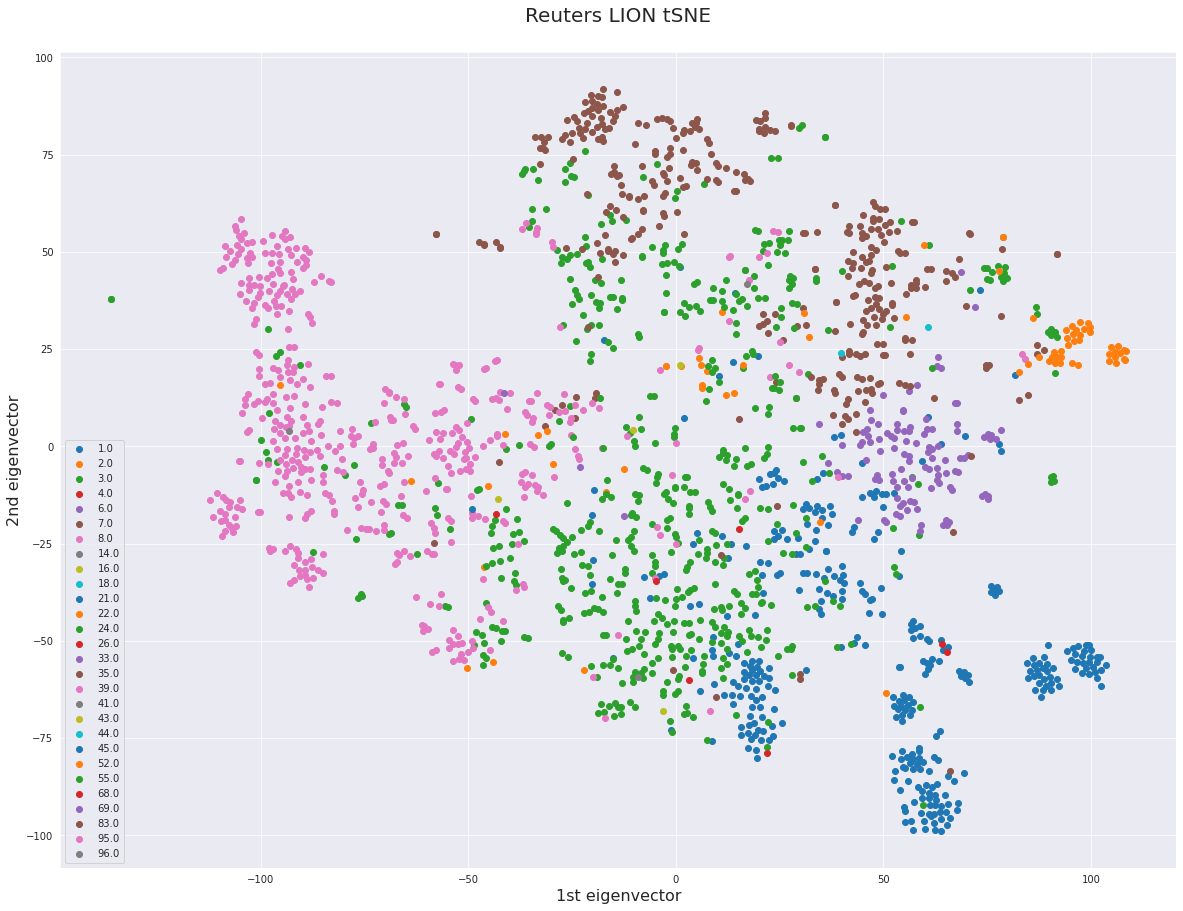

In [28]:
plot_2d(
    lion_rcv_df,
    title = 'Reuters LION tSNE',
    labels=np.unique(tsne_rcv_df['target']))

## LION tSNE with MDS Reuters

In [23]:
%%capture
rcv_mds = MDS(n_components=2)
X_rcv_mds = rcv_mds.fit_transform(rcv_train.loc[:, rcv_train.columns != 'target'].values)

In [25]:
%%capture
lionTSNE_rcv = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_mds_rcv = lionTSNE_rcv.fit(X_rcv_mds, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [26]:
lion_mds_rcv_df = pd.DataFrame(Y_lionTSNE_mds_rcv, columns=['1st eigenvector', '2nd eigenvector'])
lion_mds_rcv_df['target'] = rcv_train['target'].values

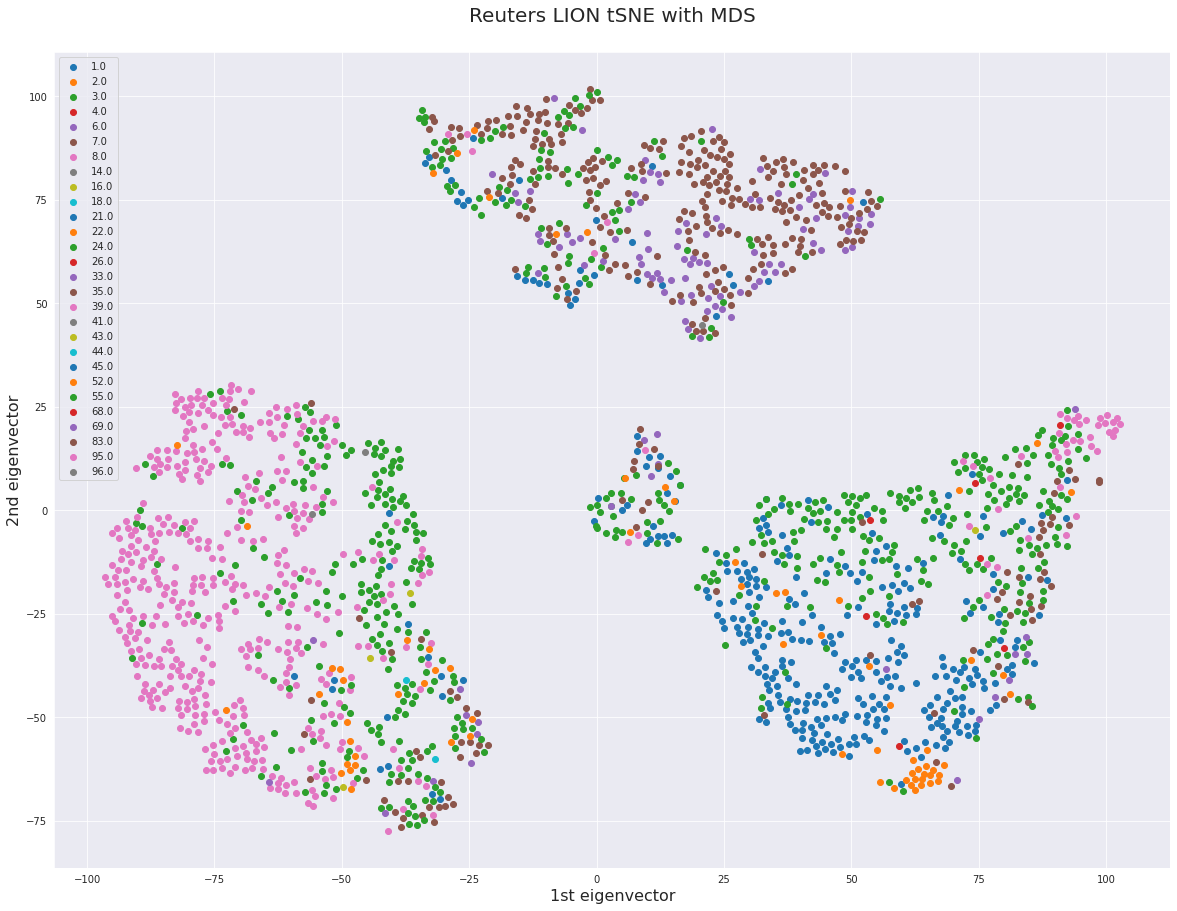

In [27]:
plot_2d(
    lion_mds_rcv_df,
    title = 'Reuters LION tSNE with MDS',
    labels=np.unique(tsne_rcv_df['target']))

## LION tSNE with PCA Reuters

In [30]:
%%capture
rcv_pca = PCA(n_components=2)
X_rcv_pca = rcv_pca.fit_transform(rcv_train.loc[:, rcv_train.columns != 'target'].values)

In [31]:
%%capture
lionTSNE_rcv = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_pca_rcv = lionTSNE_rcv.fit(X_rcv_pca, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [32]:
lion_pca_rcv_df = pd.DataFrame(Y_lionTSNE_pca_rcv, columns=['1st eigenvector', '2nd eigenvector'])
lion_pca_rcv_df['target'] = rcv_train['target'].values

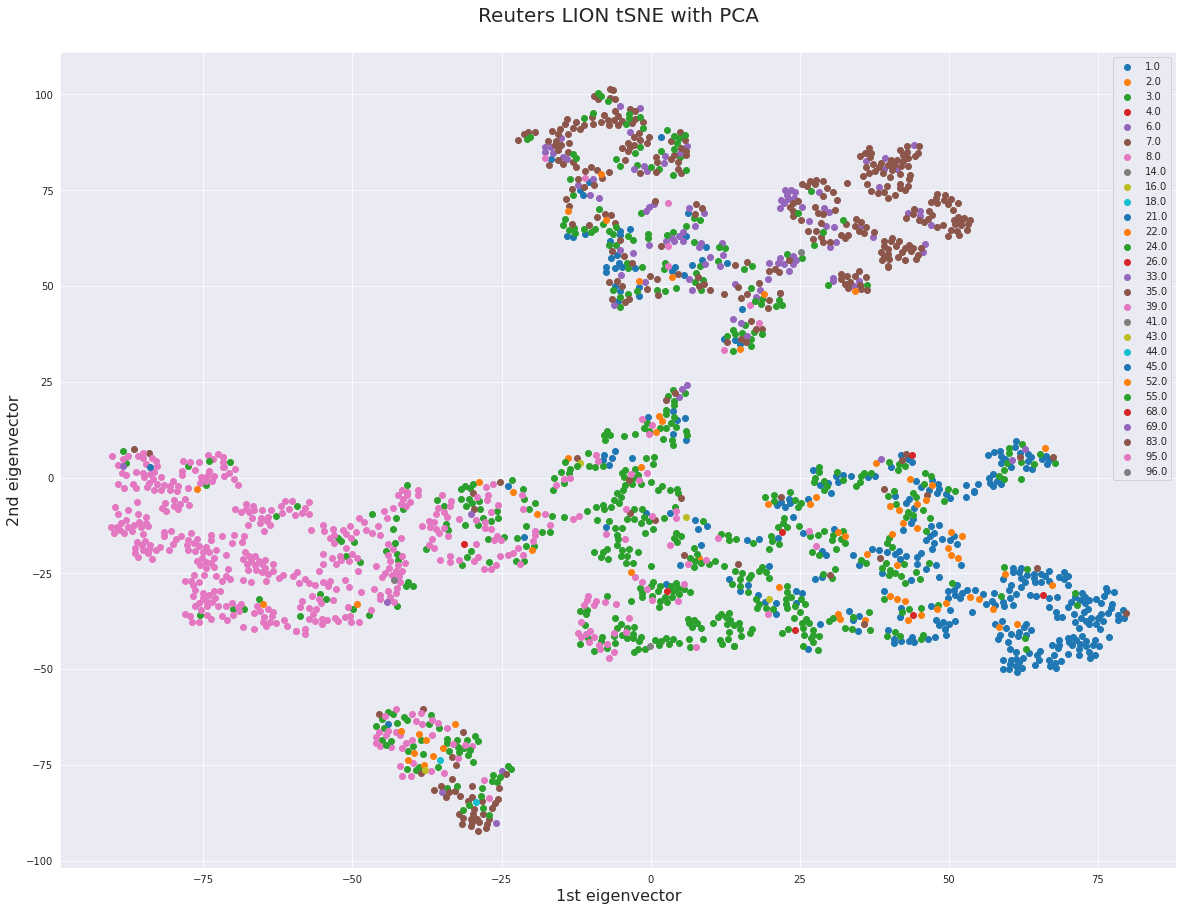

In [34]:
plot_2d(
    lion_pca_rcv_df,
    title = 'Reuters LION tSNE with PCA',
    labels=np.unique(tsne_rcv_df['target']))

# kNN sampling on Reuters

Let's sample from Reuters dataset only this type of articles, which occurs more than 100 times. Then find 100 the nearest neighbours of each class centroid.


In [59]:
knn_train = df_rcv[:13000]
knn_train = knn_train.rename(columns={"3": "target"})

In [70]:
vc = knn_train.target.value_counts().reset_index(name="count").query("count > 100")["index"].values
knn_train = knn_train[knn_train.target.isin(vc)]
knn_train.target.value_counts()

3.0     3628
8.0     2956
1.0     2438
7.0     2248
6.0      687
24.0     504
22.0     389
Name: target, dtype: int64

In [71]:
rcv_classes = np.unique(knn_train.target)
rcv_classes

array([ 1.,  3.,  6.,  7.,  8., 22., 24.])

In [75]:
def get_rcv_neighbors(train, test_row, num_neighbors, class_type):
  distances = list()
  for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  result_df = pd.DataFrame()
  for i in range(num_neighbors):
    tmp_df = pd.DataFrame([distances[i][0]])
    result_df = result_df.append(tmp_df, ignore_index=True)

  result_df['target'] = class_type
  return result_df

In [74]:
X_knn_train = knn_train.drop(columns=['target'])
y_knn_train = knn_train['target']

clf = NearestCentroid()
clf.fit(X_knn_train, y_knn_train)
clf.centroids_

array([[ 0.04321062, -0.25605802,  0.03795377, -0.06950511,  0.02364291,
         0.00425586,  0.16369905, -0.06249467, -0.34265162, -0.17920153,
         0.23755435, -0.12687103, -0.0398312 ,  0.31913115,  0.13602672,
        -0.02165076,  0.131704  , -0.15166509,  0.12659137, -0.27838738,
        -0.10846114,  0.10122729,  0.06304028,  0.03623564, -0.09564356,
         0.01759712,  0.1081409 ,  0.00228851,  0.07862112,  0.04302923],
       [-0.04606677,  0.01245369,  0.01444727,  0.15352598, -0.12574757,
         0.0151222 , -0.01963372, -0.01456375, -0.06675221,  0.02856355,
         0.08764848, -0.03368315, -0.01841919, -0.00585389, -0.01201278,
        -0.02916579, -0.0180923 , -0.04620993,  0.15634386, -0.01940627,
        -0.13799666, -0.06078541, -0.19433031,  0.02088019, -0.0436983 ,
         0.14850532, -0.04908423,  0.04404284, -0.13131082, -0.08160086],
       [ 0.19222447, -0.12624219,  0.36815639, -0.09170821,  0.30912586,
         0.10148218, -0.17562004, -0.10329856, -0

In [80]:
rcv_knn_df = pd.DataFrame()

for i in range(7):
  rcv_knn_df = rcv_knn_df.append(get_rcv_neighbors(X_knn_train.values, clf.centroids_[int(i)], 300, str(rcv_classes[i])), ignore_index=True)

rcv_knn_df['target'].value_counts()

3.0     300
8.0     300
22.0    300
6.0     300
7.0     300
1.0     300
24.0    300
Name: target, dtype: int64

## Reuters tSNE knn

In [83]:
tsne = TSNE(n_components=2, n_iter=3000, random_state=RANDOM_STATE)
layers = tsne.fit_transform(rcv_knn_df.loc[:, rcv_knn_df.columns != 'target'].values)

In [85]:
tsne_knn_rcv_df = pd.DataFrame(layers, columns=['1st eigenvector', '2nd eigenvector'])
tsne_knn_rcv_df['target'] = rcv_knn_df['target'].values

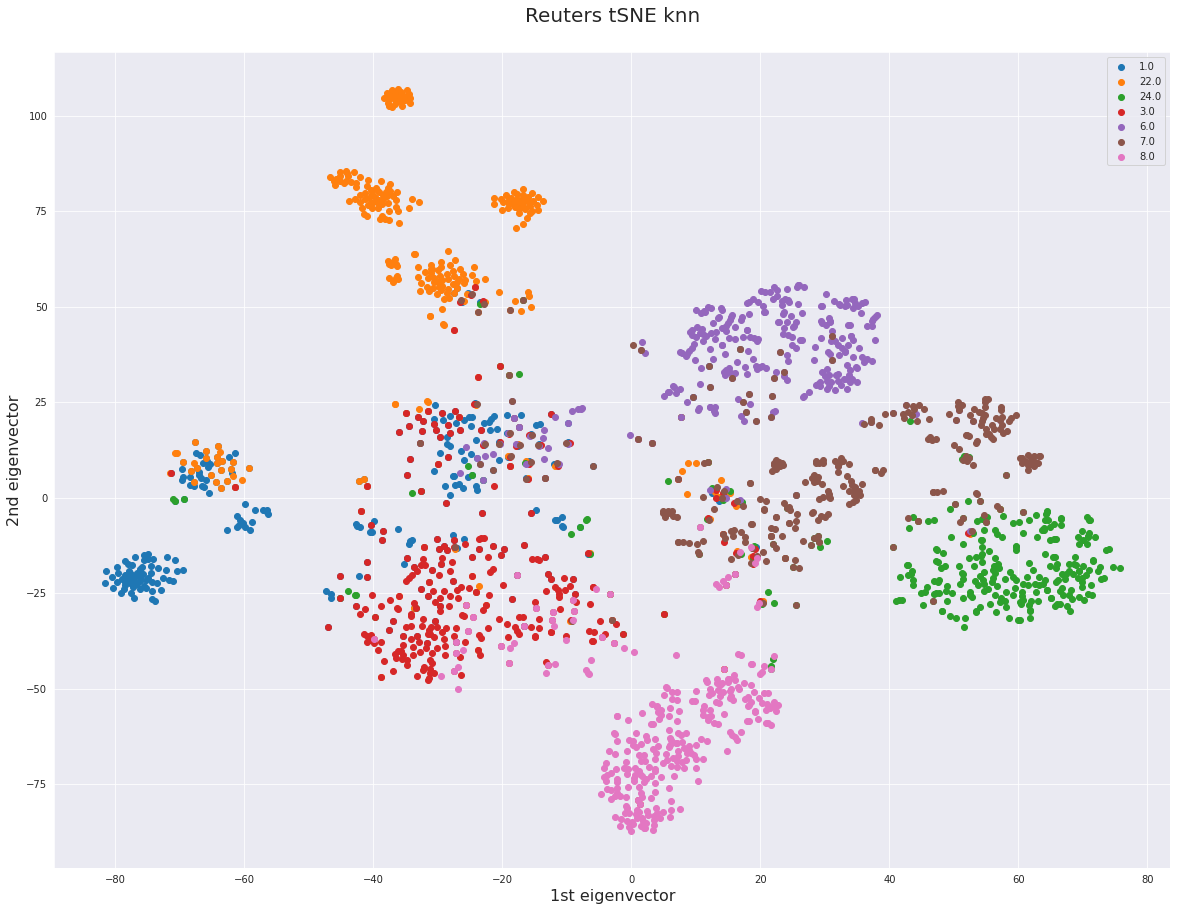

In [86]:
plot_2d(
    tsne_knn_rcv_df,
    title = 'Reuters tSNE knn',
    labels=np.unique(rcv_knn_df['target']))

## Reuters LION tSNE knn

In [87]:
%%capture
lionTSNE_rcv = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_rcv = lionTSNE_rcv.fit(rcv_knn_df.loc[:, rcv_knn_df.columns != 'target'].values, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [88]:
liontsne_knn_rcv_df = pd.DataFrame(Y_lionTSNE_rcv, columns=['1st eigenvector', '2nd eigenvector'])
liontsne_knn_rcv_df['target'] = rcv_knn_df['target'].values

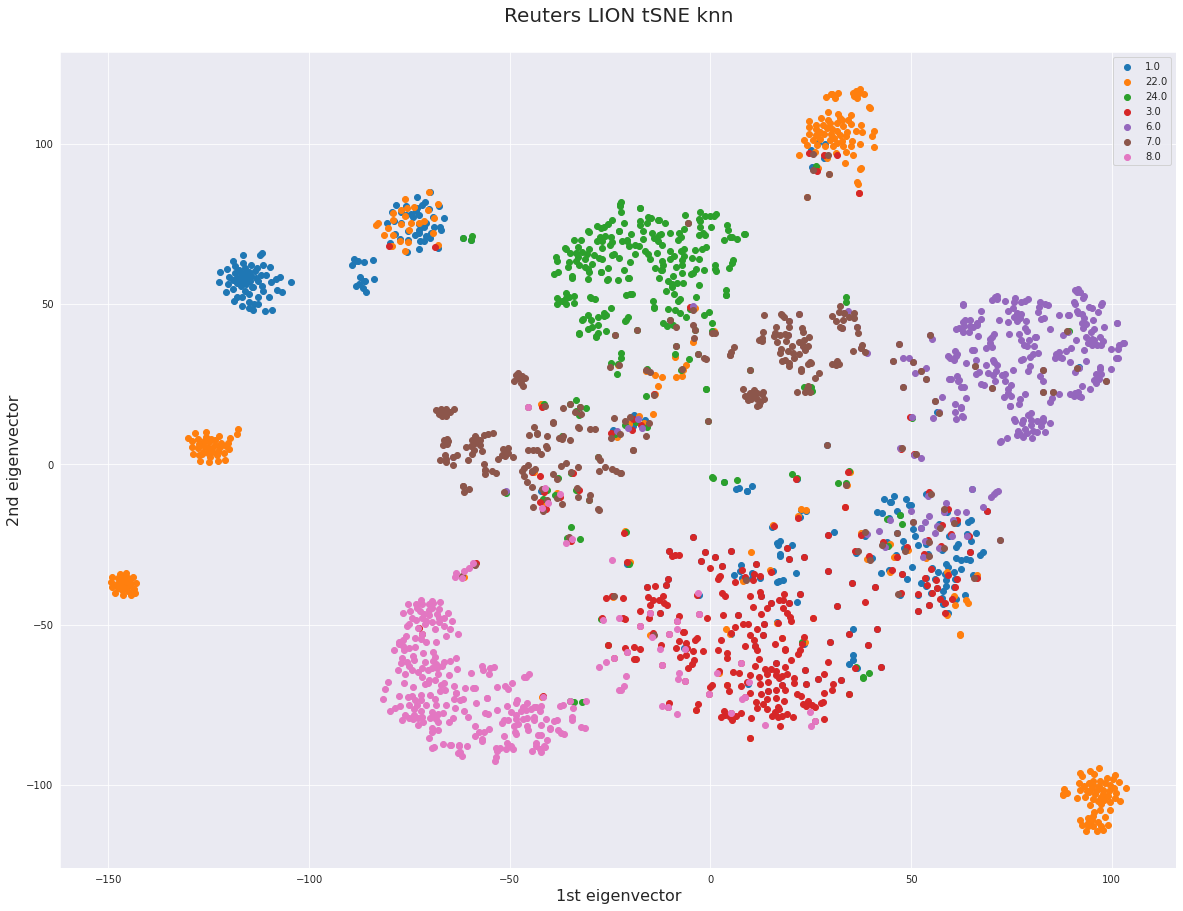

In [89]:
plot_2d(
    liontsne_knn_rcv_df,
    title = 'Reuters LION tSNE knn',
    labels=np.unique(rcv_knn_df['target']))

## Reuters LION tSNE with MDS and knn 

In [90]:
%%capture
rcv_mds = MDS(n_components=2)
X_rcv_knn_mds = rcv_mds.fit_transform(rcv_knn_df.loc[:, rcv_knn_df.columns != 'target'].values)

In [91]:
%%capture
lionTSNE_rcv = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_mds_rcv = lionTSNE_rcv.fit(X_rcv_knn_mds, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [92]:
liontsne_knn_mds_rcv_df = pd.DataFrame(Y_lionTSNE_mds_rcv, columns=['1st eigenvector', '2nd eigenvector'])
liontsne_knn_mds_rcv_df['target'] = rcv_knn_df['target'].values

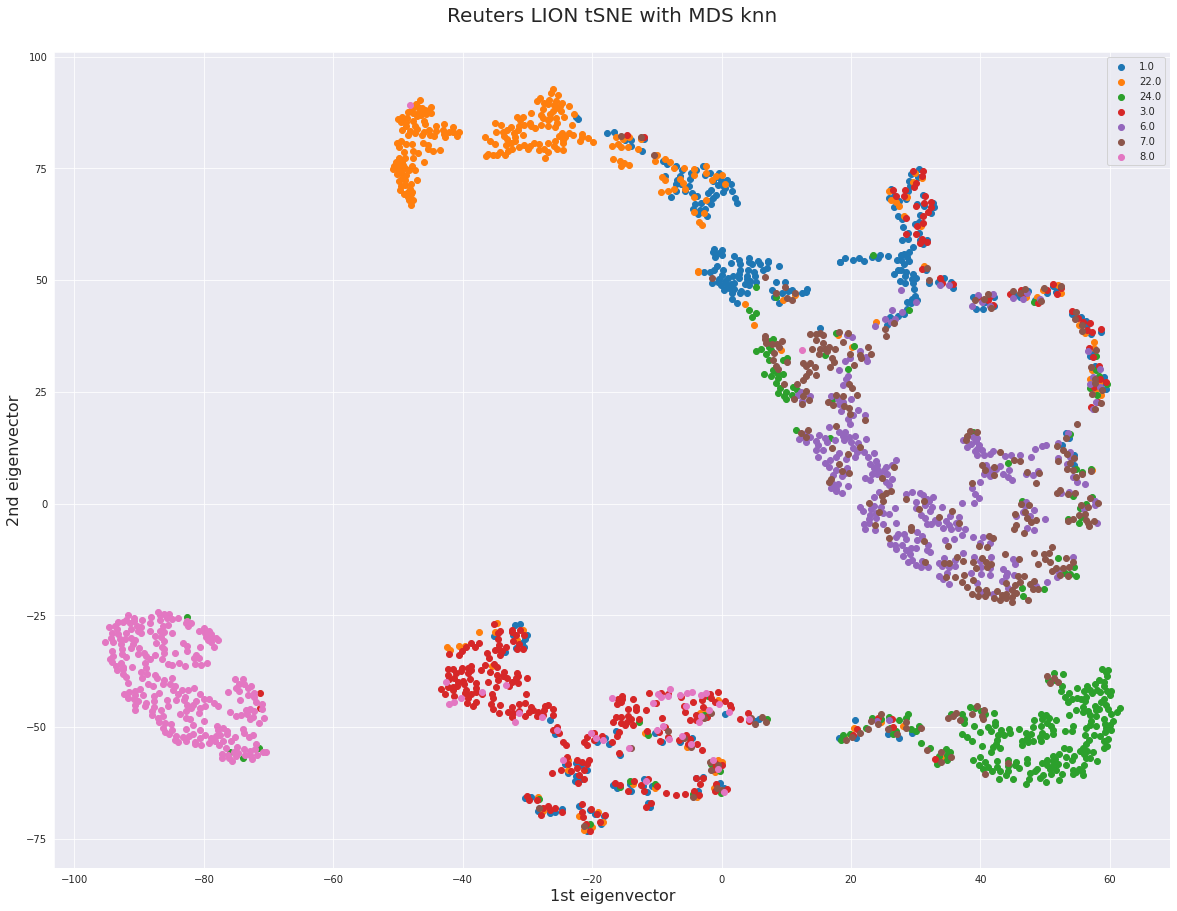

In [93]:
plot_2d(
    liontsne_knn_mds_rcv_df,
    title = 'Reuters LION tSNE with MDS knn',
    labels=np.unique(rcv_knn_df['target']))

Reuters LION tSNE with PCA and knn

In [94]:
%%capture
rcv_pca = PCA(n_components=2)
X_rcv_pca = rcv_pca.fit_transform(rcv_knn_df.loc[:, rcv_knn_df.columns != 'target'].values)

In [95]:
%%capture
lionTSNE_rcv = lion_tsne.LionTSNE(perplexity=30)
Y_lionTSNE_pca_rcv = lionTSNE_rcv.fit(X_rcv_pca, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                      'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

In [96]:
liontsne_knn_pca_rcv_df = pd.DataFrame(Y_lionTSNE_pca_rcv, columns=['1st eigenvector', '2nd eigenvector'])
liontsne_knn_pca_rcv_df['target'] = rcv_knn_df['target'].values

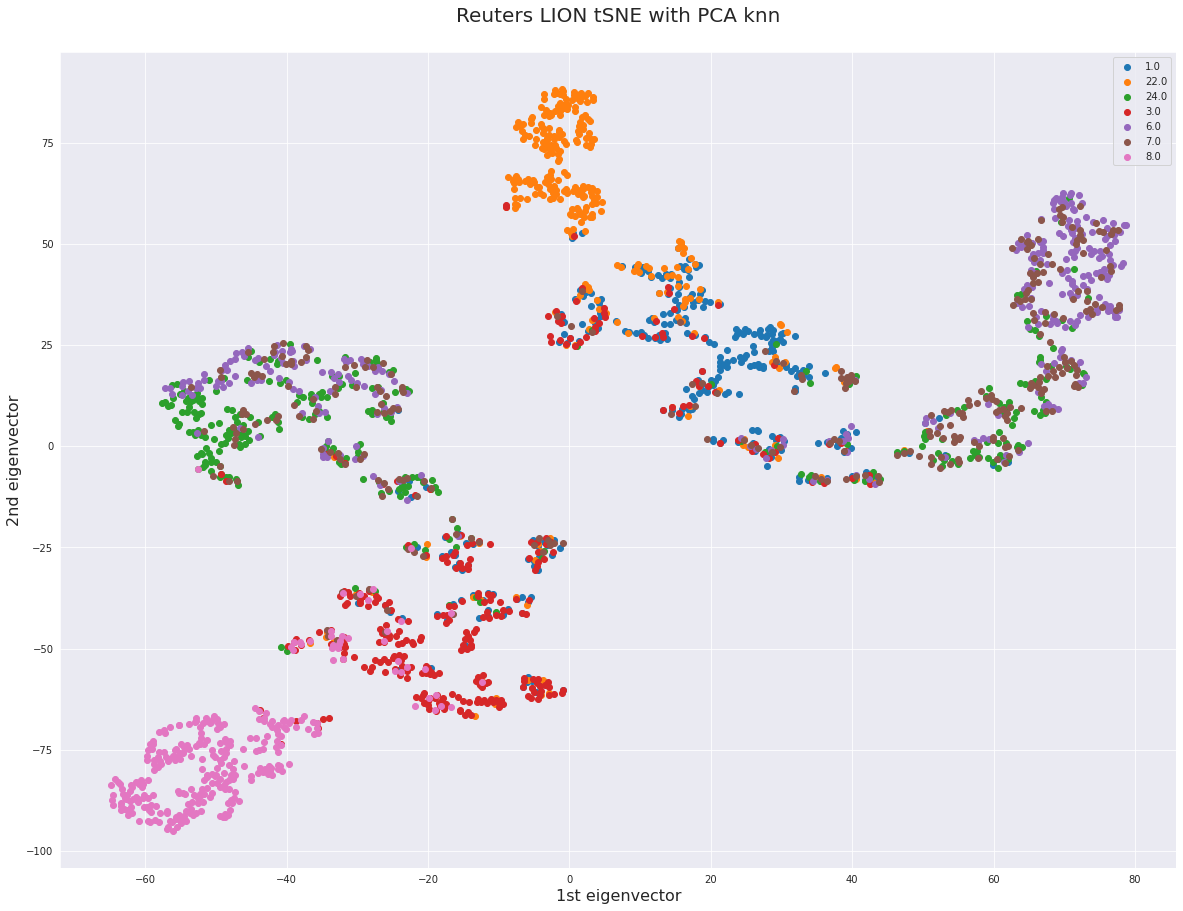

In [98]:
plot_2d(
    liontsne_knn_pca_rcv_df,
    title = 'Reuters LION tSNE with PCA knn',
    labels=np.unique(rcv_knn_df['target']))